In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Sparkling.csv',parse_dates=True,squeeze=True,index_col=0)
df1 = pd.read_csv('Rose.csv',parse_dates=True,squeeze=True,index_col=0)

In [3]:
df.head()

YearMonth
1980-01-01    1686
1980-02-01    1591
1980-03-01    2304
1980-04-01    1712
1980-05-01    1471
Name: Sparkling, dtype: int64

In [4]:
df1.head()

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

#### Rose Wines plot with time stamp

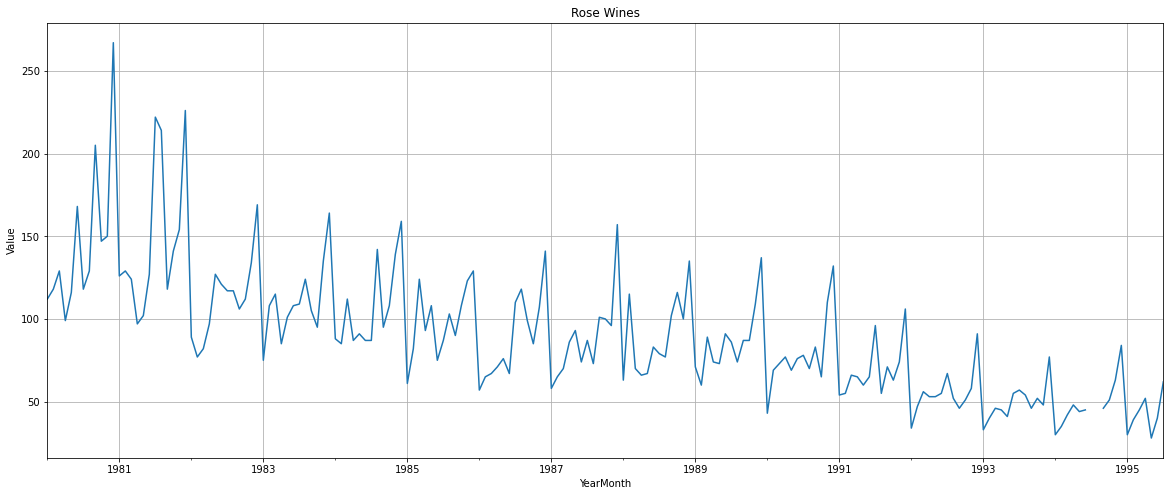

In [6]:
df1.plot();
plt.grid()

plt.xlabel('YearMonth')
plt.ylabel('Value')
plt.title('Rose Wines')
plt.show()

#### Sparkling Wines plot with time stamp

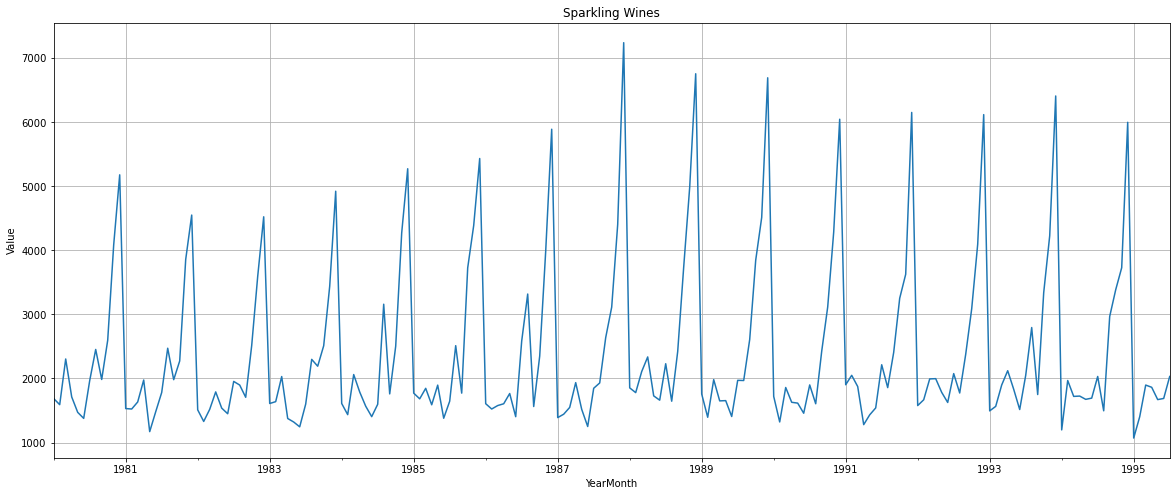

In [7]:
df.plot();
plt.grid()

plt.xlabel('YearMonth')
plt.ylabel('Value')
plt.title('Sparkling Wines')
plt.show()

### Null values

In [8]:
df.isnull().sum()

0

In [9]:
df1.isnull().sum()

2

In [10]:
df1_d = pd.DataFrame(df1)
df1_series = df1_d['Rose']
df1_series

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
              ...  
1995-03-01     45.0
1995-04-01     52.0
1995-05-01     28.0
1995-06-01     40.0
1995-07-01     62.0
Name: Rose, Length: 187, dtype: float64

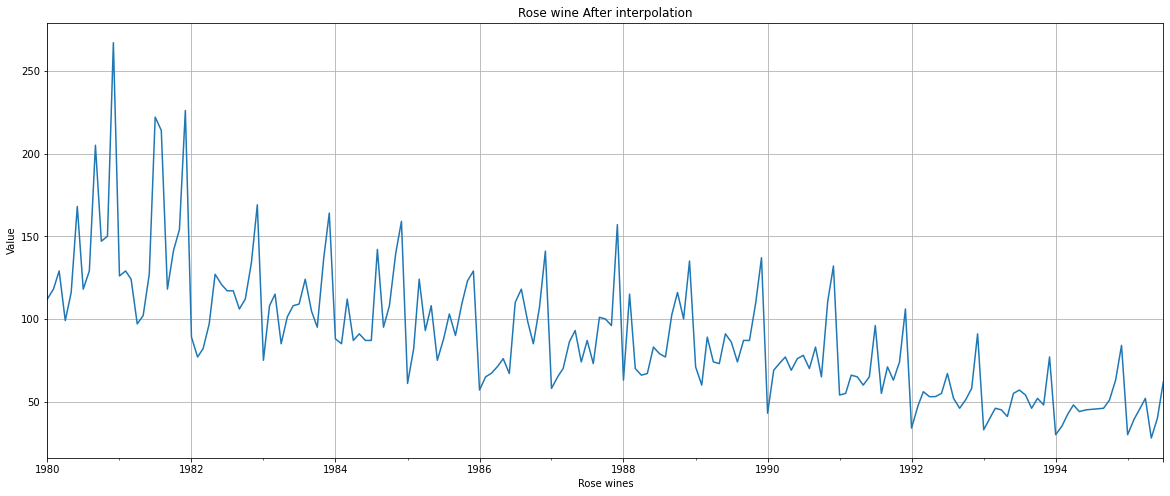

In [11]:
ts = df1_series.resample('D').mean() 

df1 = ts.interpolate(method = 'linear')
df1.plot()
plt.grid()
plt.xlabel('Rose wines')
plt.ylabel('Value')


plt.title('Rose wine After interpolation')
plt.show()


In [12]:
df1.isnull().sum()

0

In [13]:
df2 = pd.merge(df,df1,on='YearMonth')

In [14]:
df2.head()

Sparkling   Rose
YearMonth                   
1980-01-01       1686  112.0
1980-02-01       1591  118.0
1980-03-01       2304  129.0
1980-04-01       1712   99.0
1980-05-01       1471  116.0

#### Sparkling and Rose wines plot with time stamp

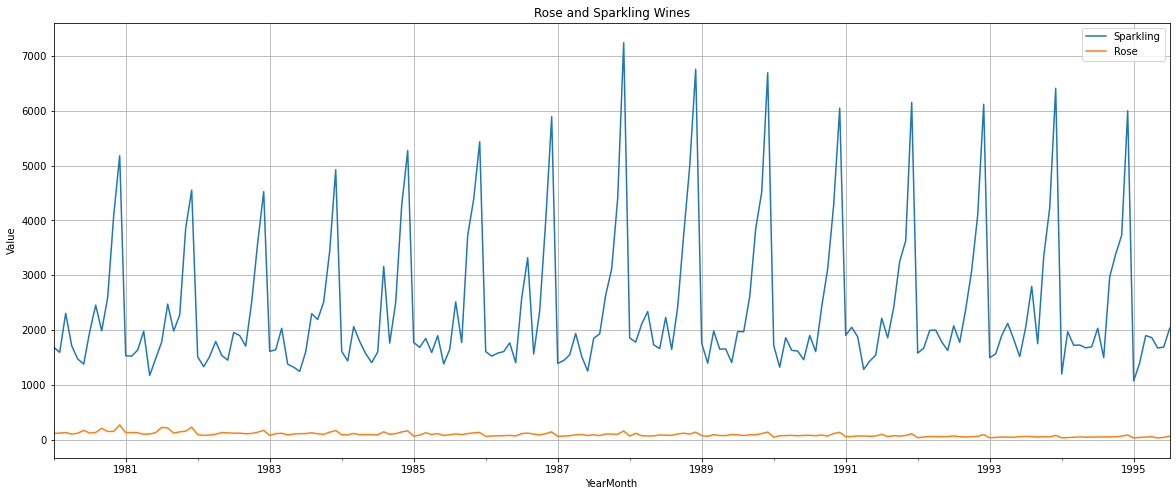

In [15]:
df2.plot();
plt.grid()


plt.xlabel('YearMonth')
plt.ylabel('Value')
plt.title('Rose and Sparkling Wines')
plt.show()

### Method 2

In [16]:
df3 = pd.read_csv('Sparkling.csv')
df4 = pd.read_csv('Rose.csv')

In [17]:
date = pd.date_range(start='1/1/1956', end='1/5/1995', freq='M')


In [18]:
df3['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df4['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df3.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1956-01-31
1   1980-02       1591 1956-02-29
2   1980-03       2304 1956-03-31
3   1980-04       1712 1956-04-30
4   1980-05       1471 1956-05-31

In [19]:
df3.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df3.drop(labels='YearMonth',inplace=True,axis=1)
df3.head()

Sparkling
Time_Stamp           
1956-01-31       1686
1956-02-29       1591
1956-03-31       2304
1956-04-30       1712
1956-05-31       1471

In [20]:
df4.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df4.drop(labels='YearMonth',inplace=True,axis=1)
df4.head()

Rose
Time_Stamp       
1956-01-31  112.0
1956-02-29  118.0
1956-03-31  129.0
1956-04-30   99.0
1956-05-31  116.0

### PIVOT TABLES FOR ROSE AND SPARKLING WINES

### Yearly sale month wise for sparkling wines

In [21]:
yearly_months_sale_sparkling = pd.pivot_table(df3, values = 'Sparkling', columns = df3.index.month, 
                                        index = df3.index.year)

yearly_months_sale_sparkling

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1956        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1957        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1958        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1959        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1960        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1961        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1962        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1963        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1964        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1965        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1966        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1967        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1968        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1969        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1970        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1971        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1956        1984.0  2596.0  4087.0  5179.0  
1957        1981.0  2273.0  3857.0  4551.0  
1958        1706.0  2514.0  3593.0  4524.0  
1959        2191.0  2511.0  3440.0  4923.0  
1960        1759.0  2504.0  4273.0  5274.0  
1961        1771.0  3727.0  4388.0  5434.0  
1962        1562.0  2349.0  3987.0  5891.0  
1963        2638.0  3114.0  4405.0  7242.0  
1964        2421.0  3740.0  4988.0  6757.0  
1965        2608.0  3845.0  4514.0  6694.0  
1966        2424.0  3116.0  4286.0  6047.0  
1967        2408.0  3252.0  3627.0  6153.0  
1968        2377.0  3088.0  4096.0  6119.0  
1969        1749.0  3339.0  4227.0  6410.0  
1970        2968.0  3385.0  3729.0  5999.0  
1971           NaN     NaN     NaN     NaN

### Yearly sale month wise for Rose wines

In [22]:
yearly_months_sale_rose = pd.pivot_table(df4, values = 'Rose', columns = df4.index.month, 
                                        index = df4.index.year)

yearly_months_sale_rose

Time_Stamp     1      2      3     4      5      6      7      8      9   \
Time_Stamp                                                                 
1956        112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1957        126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1958         89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1959         75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1960         88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1961         61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1962         57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1963         58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1964         63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1965         71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1966         43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1967         54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1968         34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1969         33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1970         30.0   35.0   42.0  48.0   44.0   45.0    NaN    NaN   46.0   
1971         30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

Time_Stamp     10     11     12  
Time_Stamp                       
1956        147.0  150.0  267.0  
1957        141.0  154.0  226.0  
1958        112.0  134.0  169.0  
1959         95.0  135.0  164.0  
1960        108.0  139.0  159.0  
1961        108.0  123.0  129.0  
1962         85.0  107.0  141.0  
1963        100.0   96.0  157.0  
1964        116.0  100.0  135.0  
1965         87.0  109.0  137.0  
1966         65.0  110.0  132.0  
1967         63.0   74.0  106.0  
1968         51.0   58.0   91.0  
1969         52.0   48.0   77.0  
1970         51.0   63.0   84.0  
1971          NaN    NaN    NaN

In [23]:
df2.describe()

Sparkling        Rose
count   187.000000  187.000000
mean   2402.417112   89.914380
std    1295.111540   39.238391
min    1070.000000   28.000000
25%    1605.000000   62.500000
50%    1874.000000   85.000000
75%    2549.000000  111.000000
max    7242.000000  267.000000

Text(0.5, 1.0, 'Rose wines yearly production')

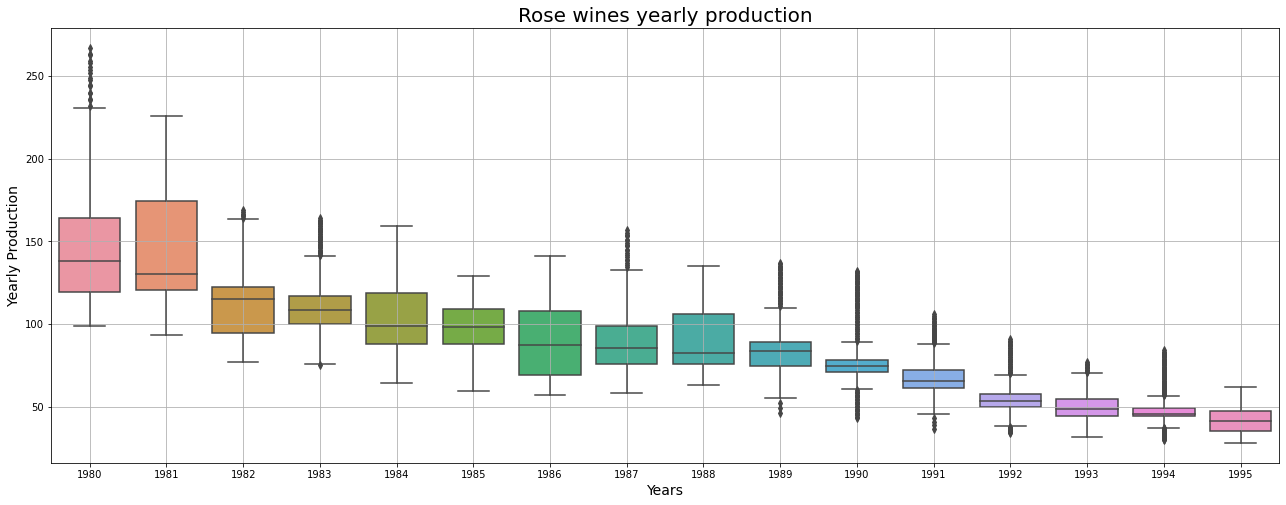

In [24]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df1.index.year, df1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years',fontsize=14);
plt.ylabel('Yearly Production',fontsize=14);
plt.title('Rose wines yearly production',fontsize=20)

Text(0.5, 1.0, 'Sparkling wines yearly production')

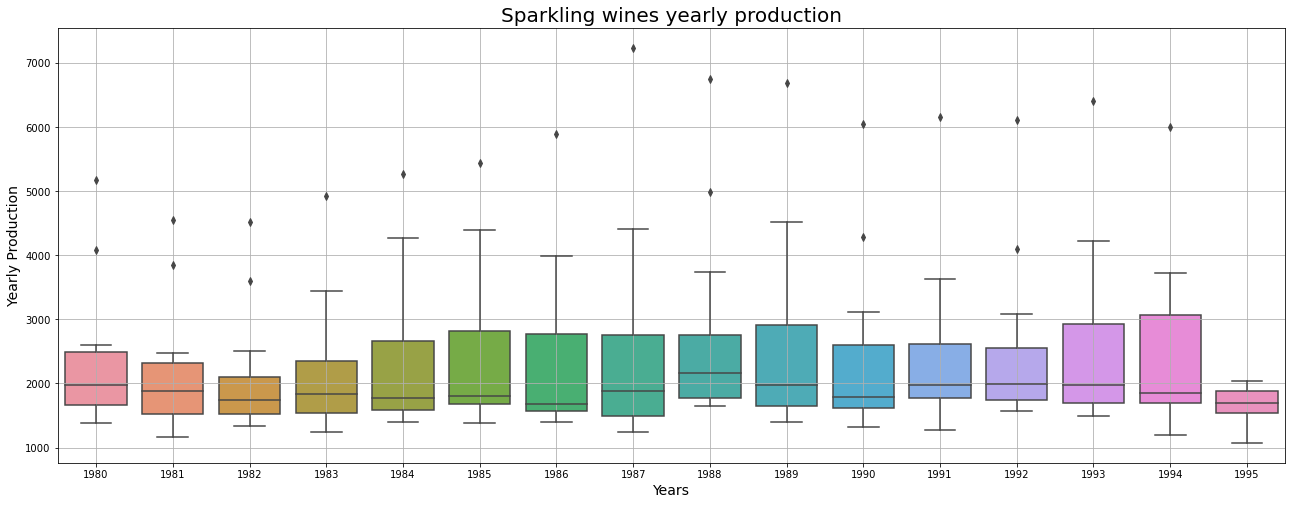

In [25]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df.index.year, df, ax=ax)
plt.grid();
plt.xlabel('Years',fontsize=14);
plt.ylabel('Yearly Production',fontsize=14);
plt.title('Sparkling wines yearly production',fontsize=20)

Text(0.5, 1.0, 'Rose Wines Monthly production')

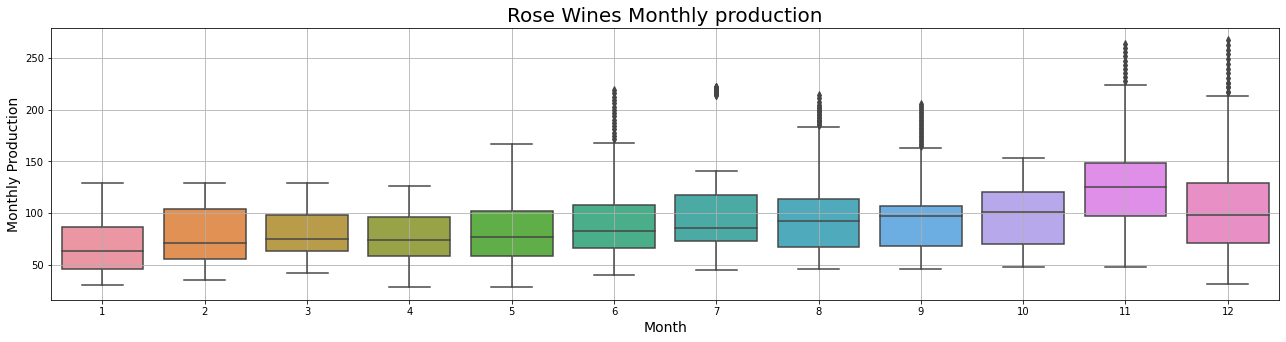

In [26]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df1.index.month, df1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Month',fontsize=14);
plt.ylabel('Monthly Production',fontsize=14);
plt.title('Rose Wines Monthly production',fontsize=20)

Text(0.5, 1.0, 'Sparkling wines Monthly production')

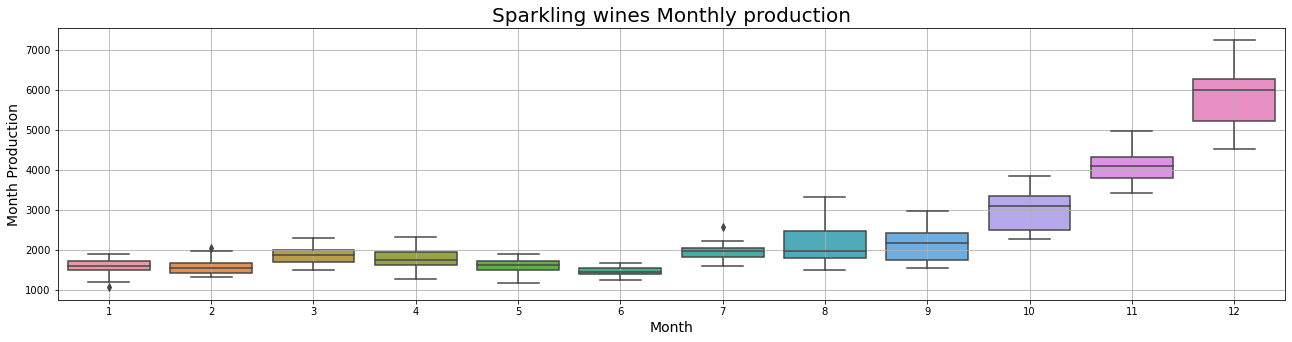

In [27]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df.index.month, df, ax=ax)
plt.grid();

plt.xlabel('Month',fontsize=14);
plt.ylabel('Month Production',fontsize=14);
plt.title('Sparkling wines Monthly production',fontsize=20)

Text(0.5, 1.0, 'Rose Wines Monthly Plot')

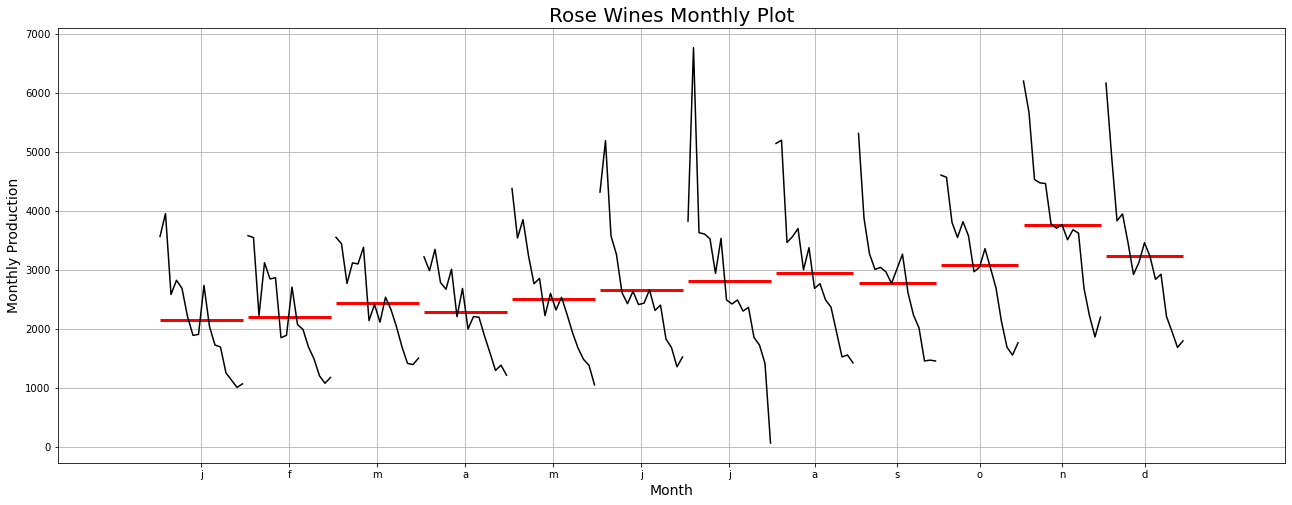

In [28]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
df1_monthly = df1.resample('M').sum()
month_plot(df1_monthly,ylabel='Wine Production',ax=ax)

plt.grid();
plt.xlabel('Month',fontsize=14);
plt.ylabel('Monthly Production',fontsize=14);
plt.title('Rose Wines Monthly Plot',fontsize=20)

Text(0.5, 1.0, 'Sparkling wines Monthly plot')

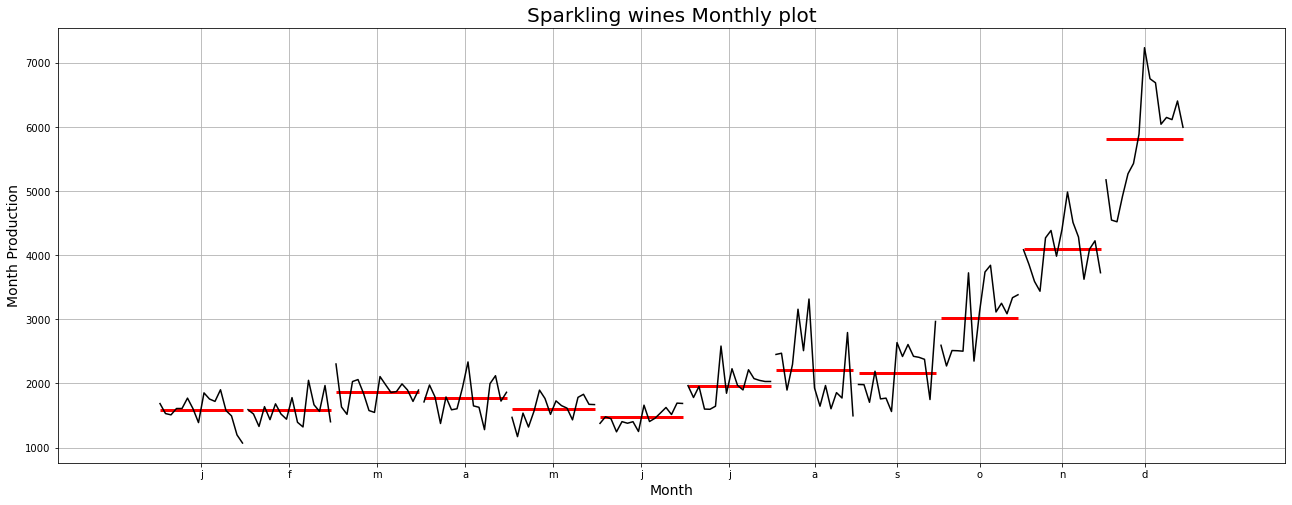

In [29]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Wines Production',ax=ax)
plt.grid();
plt.xlabel('Month',fontsize=14);
plt.ylabel('Month Production',fontsize=14);
plt.title('Sparkling wines Monthly plot',fontsize=20)

Text(0.5, 1.0, 'Rose Sales - yearly monthly production')

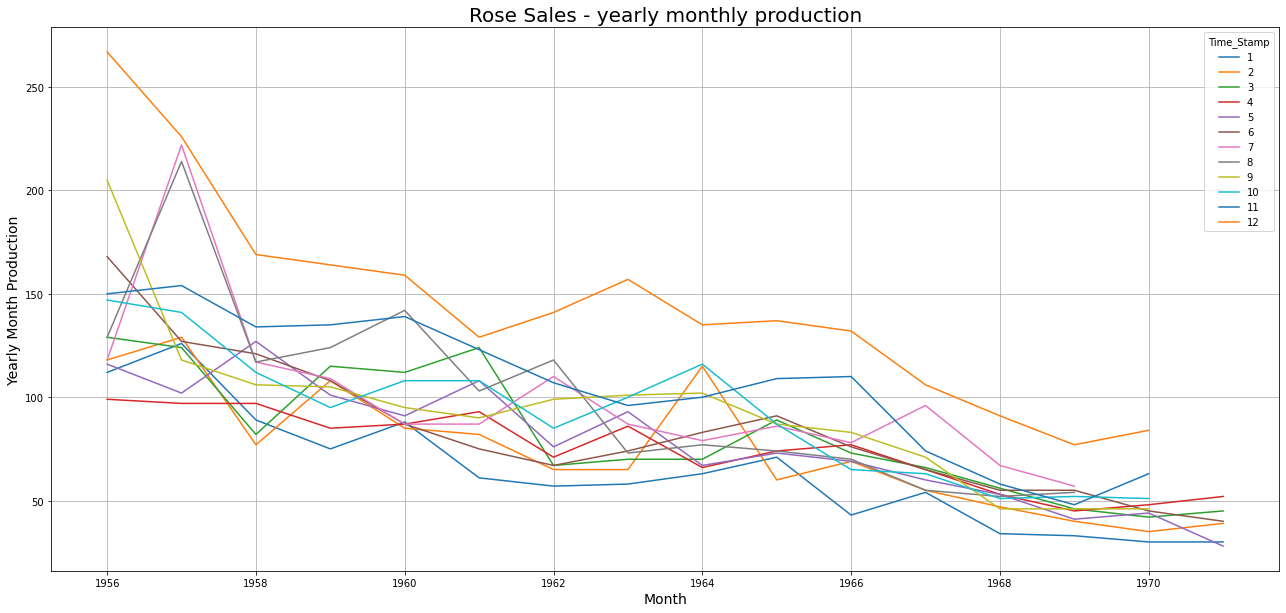

In [30]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_months_sale_rose.plot(ax=ax)
plt.grid();

plt.xlabel('Month',fontsize=14);
plt.ylabel('Yearly Month Production',fontsize=14);
plt.title('Rose Sales - yearly monthly production',fontsize=20)

Text(0.5, 1.0, 'Sparkling Sales - yearly monthly production')

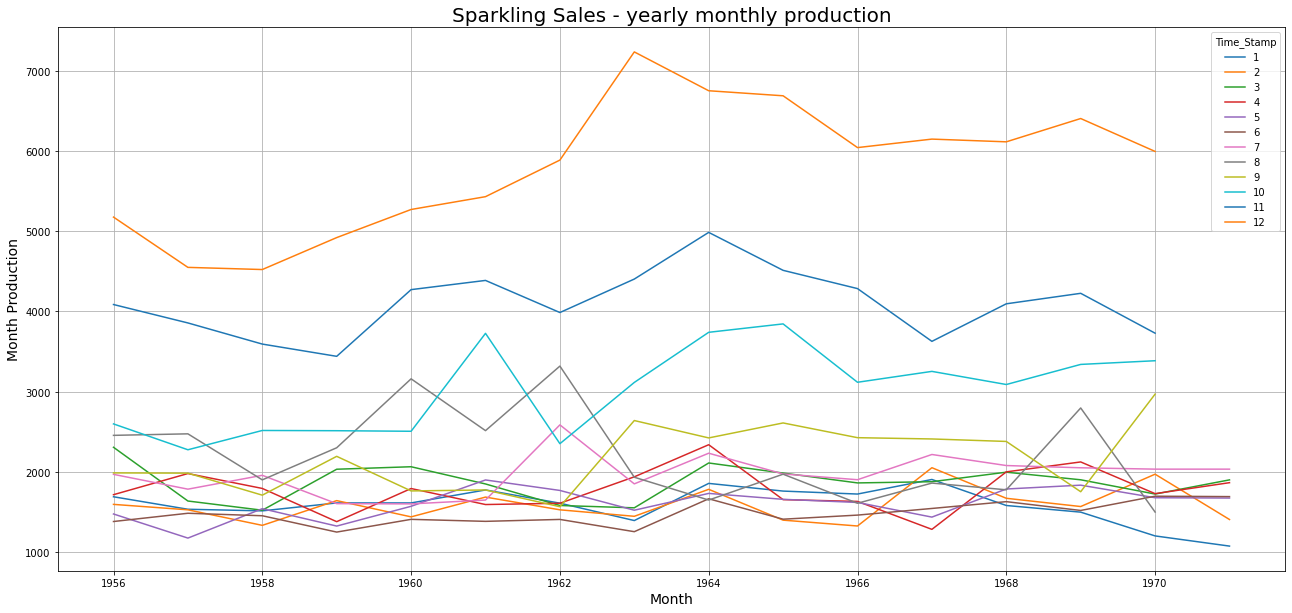

In [31]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_months_sale_sparkling.plot(ax=ax)
plt.grid();

plt.xlabel('Month',fontsize=14);
plt.ylabel('Month Production',fontsize=14);
plt.title('Sparkling Sales - yearly monthly production',fontsize=20)

### YEARLY PLOT

Text(0.5, 1.0, 'Yearly plot for Sparkling wines')

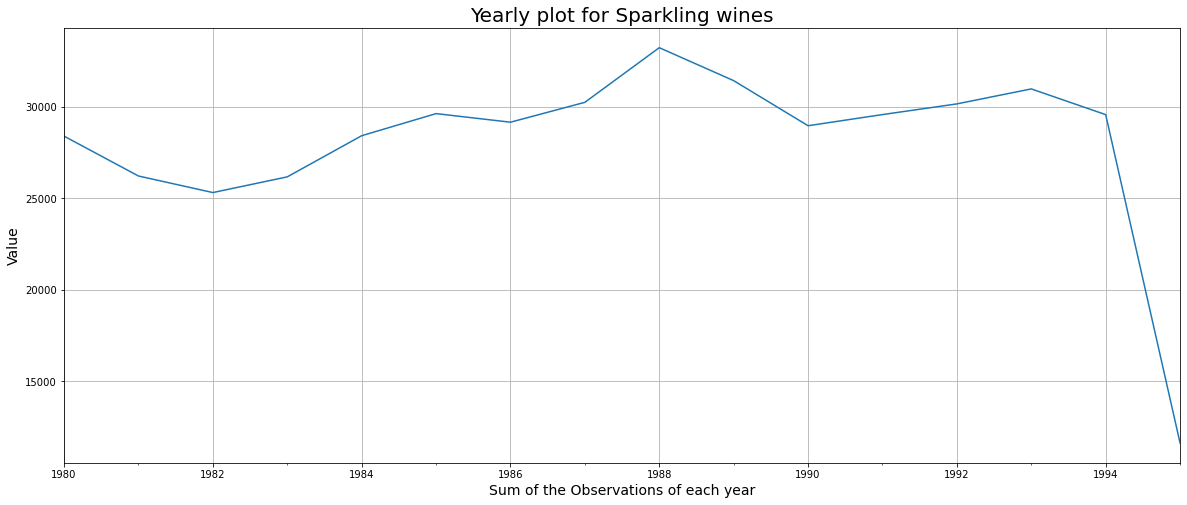

In [32]:
Sparkling_yearly_sum = df.resample('A').sum()
Sparkling_yearly_sum.head()

Sparkling_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year',fontsize=14);
plt.ylabel('Value',fontsize=14)
plt.title('Yearly plot for Sparkling wines',fontsize=20)

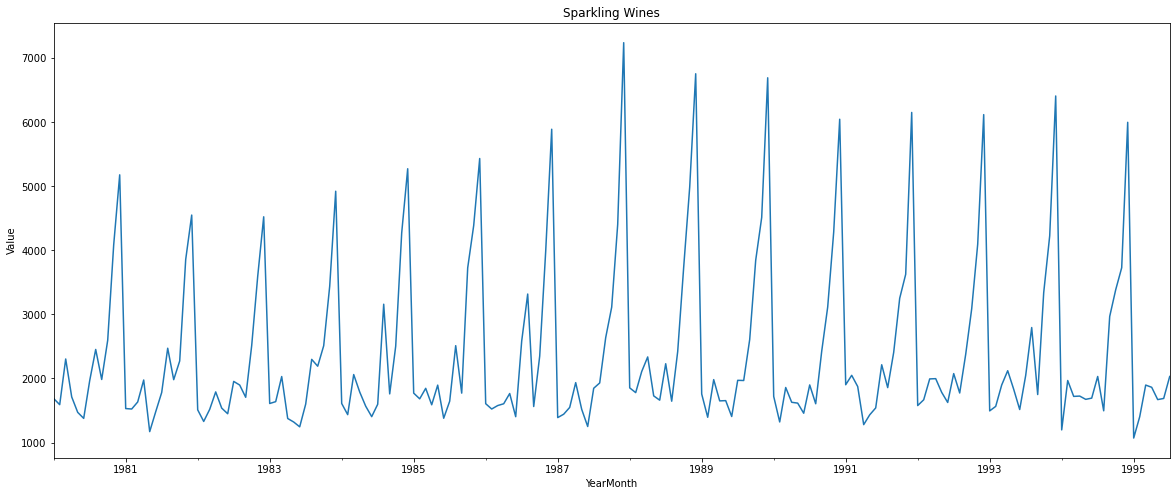

In [33]:
df.plot()
plt.grid;

plt.xlabel('YearMonth')
plt.ylabel('Value')
plt.title('Sparkling Wines')
plt.show()

Text(0.5, 1.0, 'Yearly plot for Rose wines')

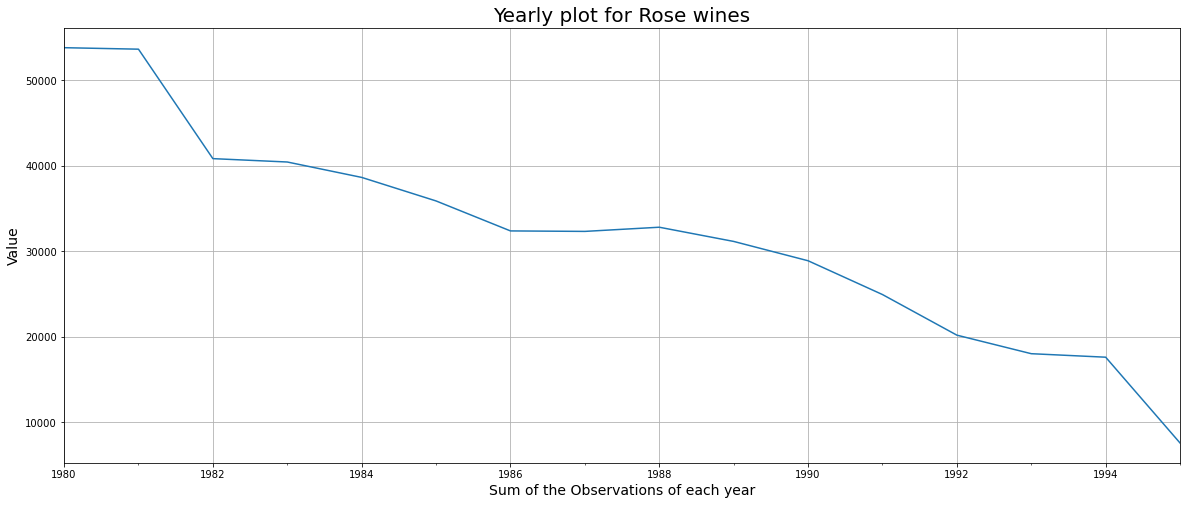

In [34]:
Rose_yearly_sum = df1.resample('A').sum()
Rose_yearly_sum.head()

Rose_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year',fontsize=14);
plt.ylabel('Value',fontsize=14)
plt.title('Yearly plot for Rose wines',fontsize=20)

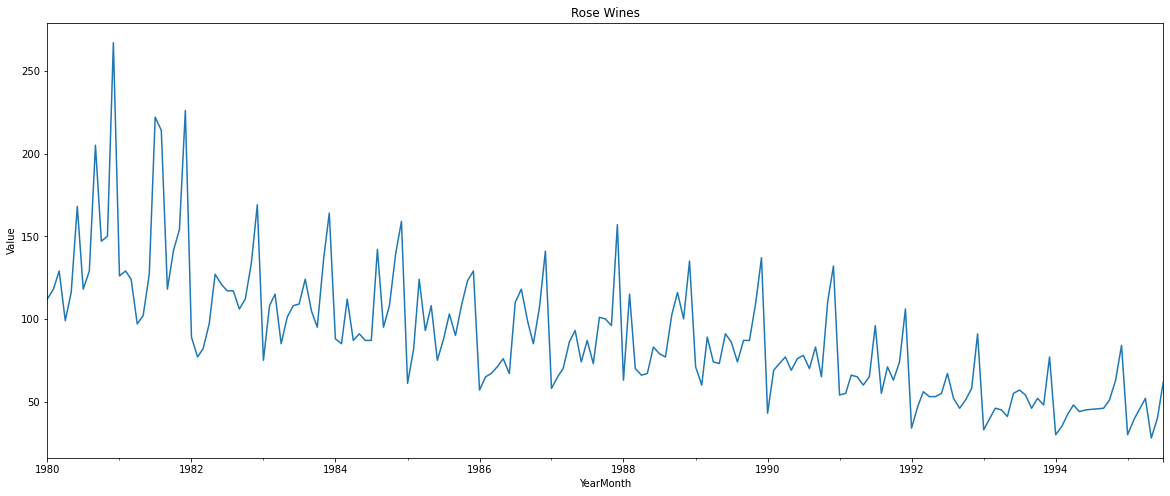

In [35]:
df1.plot()
plt.grid;

plt.xlabel('YearMonth')
plt.ylabel('Value')
plt.title('Rose Wines')
plt.show()

### Quaterly plot

In [36]:
Sparkling_quarterly_mean = df.resample('Q').mean()
Sparkling_quarterly_mean.head()

YearMonth
1980-03-31    1860.333333
1980-06-30    1520.000000
1980-09-30    2134.333333
1980-12-31    3954.000000
1981-03-31    1562.000000
Freq: Q-DEC, Name: Sparkling, dtype: float64

Text(0.5, 1.0, 'quaterly plot for Sparkling wines')

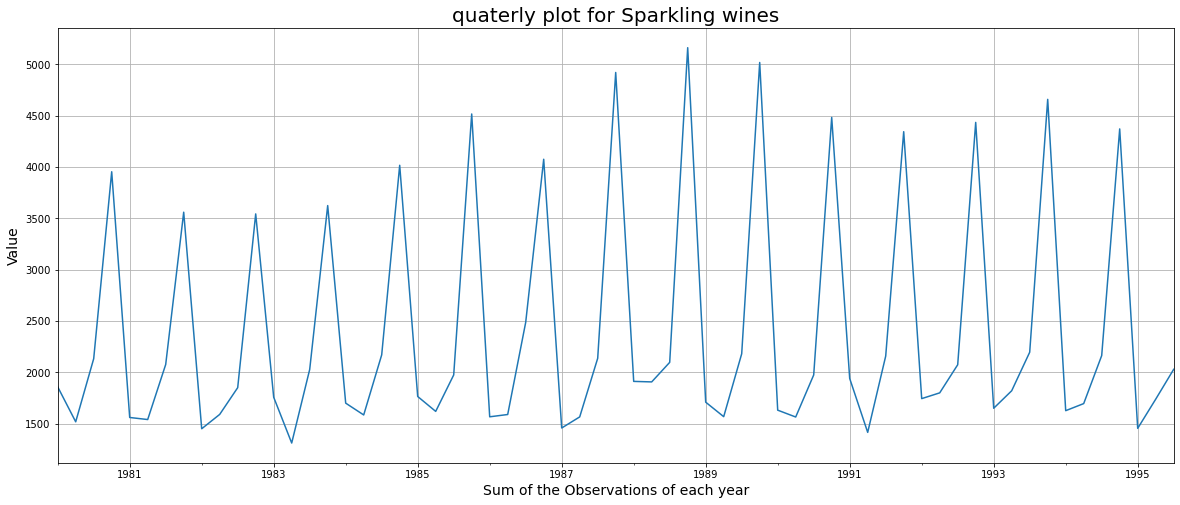

In [37]:
Sparkling_quarterly_mean.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year',fontsize=14);
plt.ylabel('Value',fontsize=14)
plt.title('quaterly plot for Sparkling wines',fontsize=20)

In [38]:
Rose_quarterly_mean = df1.resample('Q').mean()
Rose_quarterly_mean.head()

YearMonth
1980-03-31    117.439560
1980-06-30    130.851648
1980-09-30    155.119565
1980-12-31    184.353261
1981-03-31    121.494444
Freq: Q-DEC, Name: Rose, dtype: float64

Text(0.5, 1.0, 'quaterly plot for Rose wines')

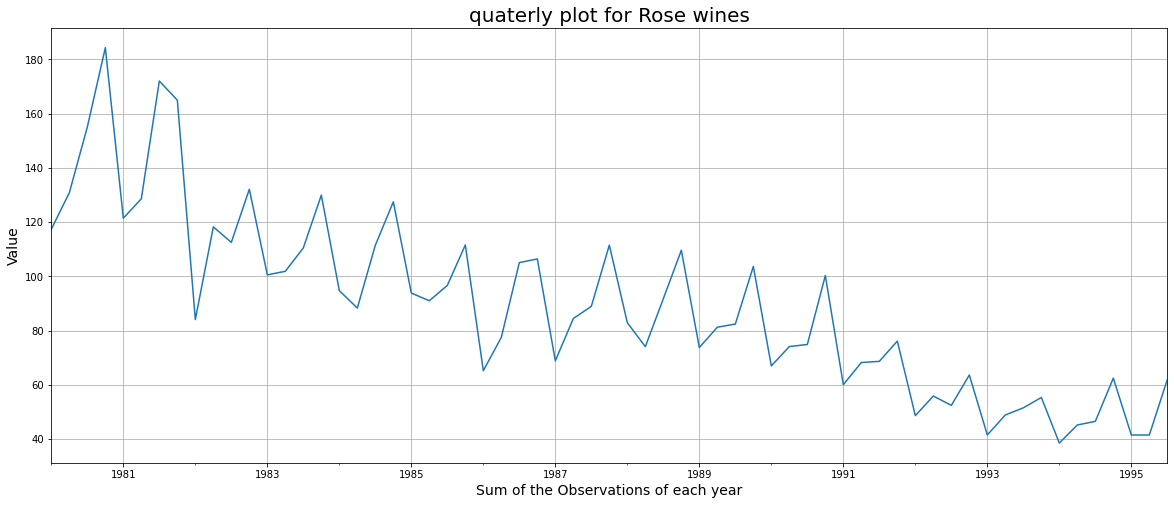

In [39]:
Rose_quarterly_mean.plot();
plt.grid()

plt.xlabel('Sum of the Observations of each year',fontsize=14);
plt.ylabel('Value',fontsize=14)
plt.title('quaterly plot for Rose wines',fontsize=20)

In [40]:
Rose_decade_sum = df1.resample('10Y').sum()
Rose_decade_sum

YearMonth
1980-12-31     53826.0
1990-12-31    367118.5
2000-12-31     88375.0
Freq: 10A-DEC, Name: Rose, dtype: float64

Text(0.5, 1.0, 'Decade plot for Rose wines')

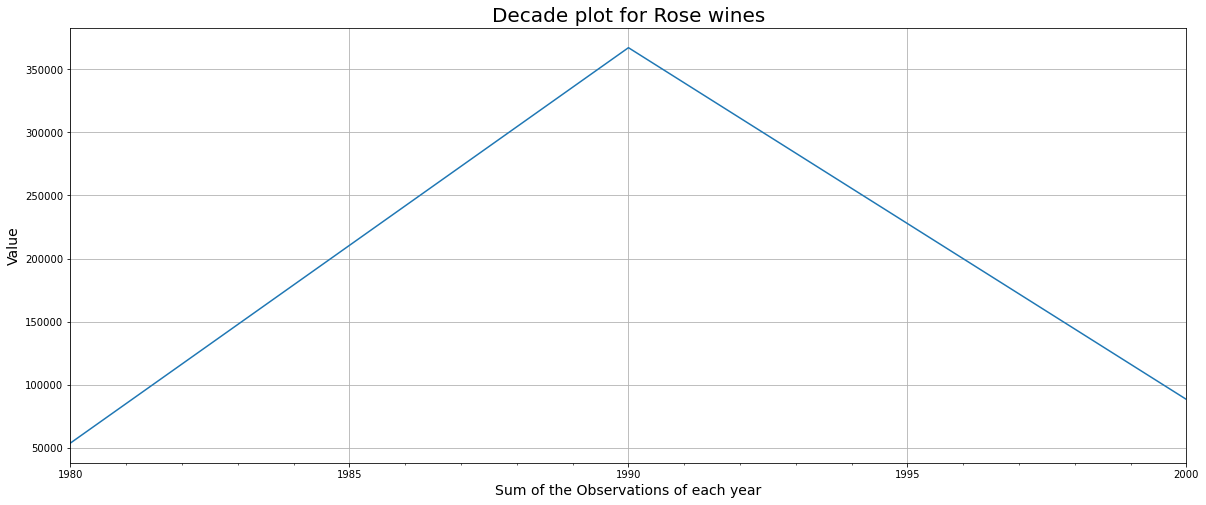

In [41]:
Rose_decade_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year',fontsize=14);
plt.ylabel('Value',fontsize=14)
plt.title('Decade plot for Rose wines',fontsize=20)

In [42]:
Sparkling_decade_sum = df.resample('10Y').sum()
Sparkling_decade_sum

YearMonth
1980-12-31     28406
1990-12-31    288893
2000-12-31    131953
Freq: 10A-DEC, Name: Sparkling, dtype: int64

Text(0.5, 1.0, 'Decade plot for Sparkling wines')

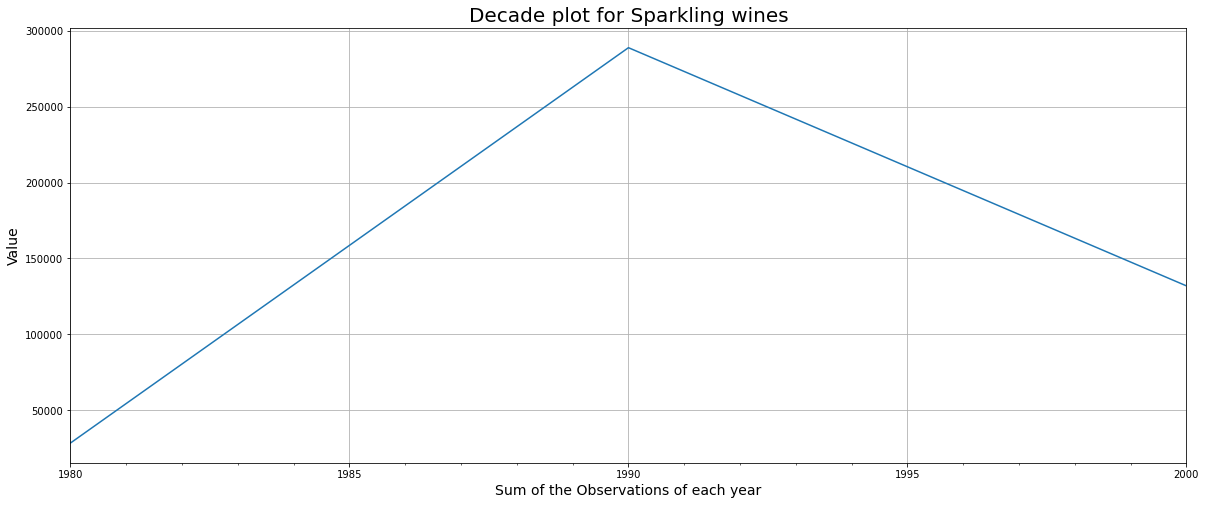

In [43]:
Sparkling_decade_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year',fontsize=14);
plt.ylabel('Value',fontsize=14)
plt.title('Decade plot for Sparkling wines',fontsize=20)

## Decompose the Time Series

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

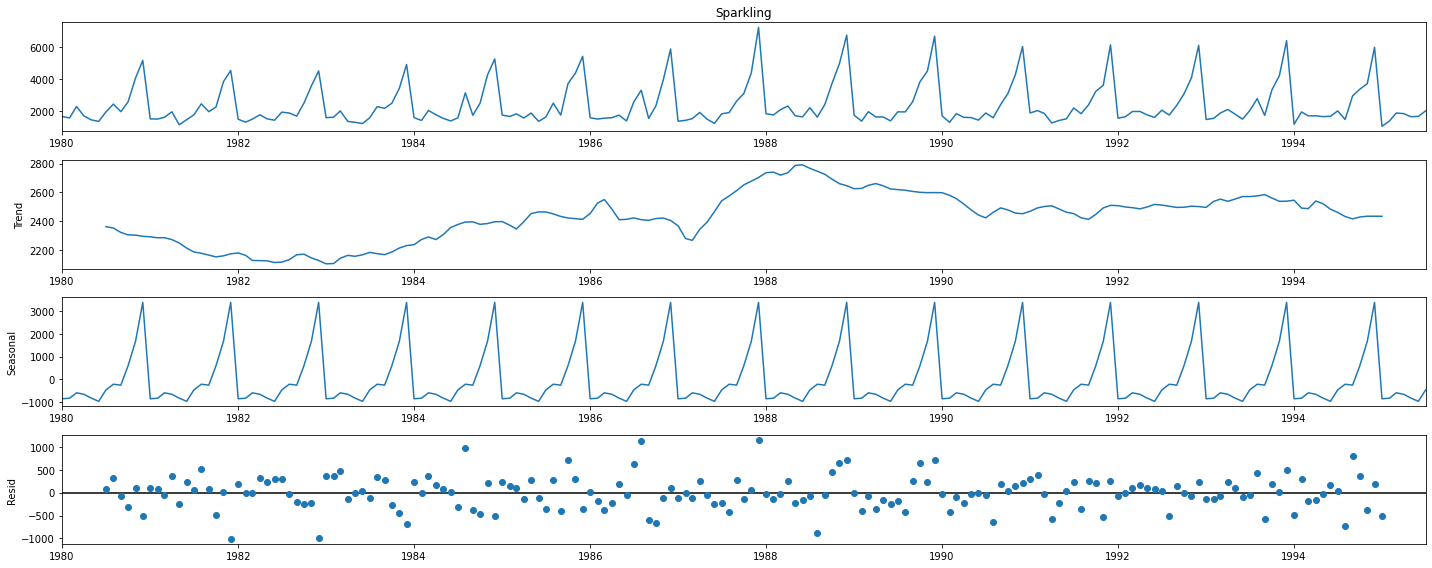

In [45]:
Sprinkle_Add_decomposition = seasonal_decompose(df,model='additive')
Sprinkle_Add_decomposition.plot();

In [46]:
sparkle_trend = Sprinkle_Add_decomposition.trend
sparkle_seasonality = Sprinkle_Add_decomposition.seasonal
sparkle_residual = Sprinkle_Add_decomposition.resid

print('Trend','\n',sparkle_trend.head(12),'\n')
print('Seasonality','\n',sparkle_seasonality.head(12),'\n')
print('Residual','\n',sparkle_residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


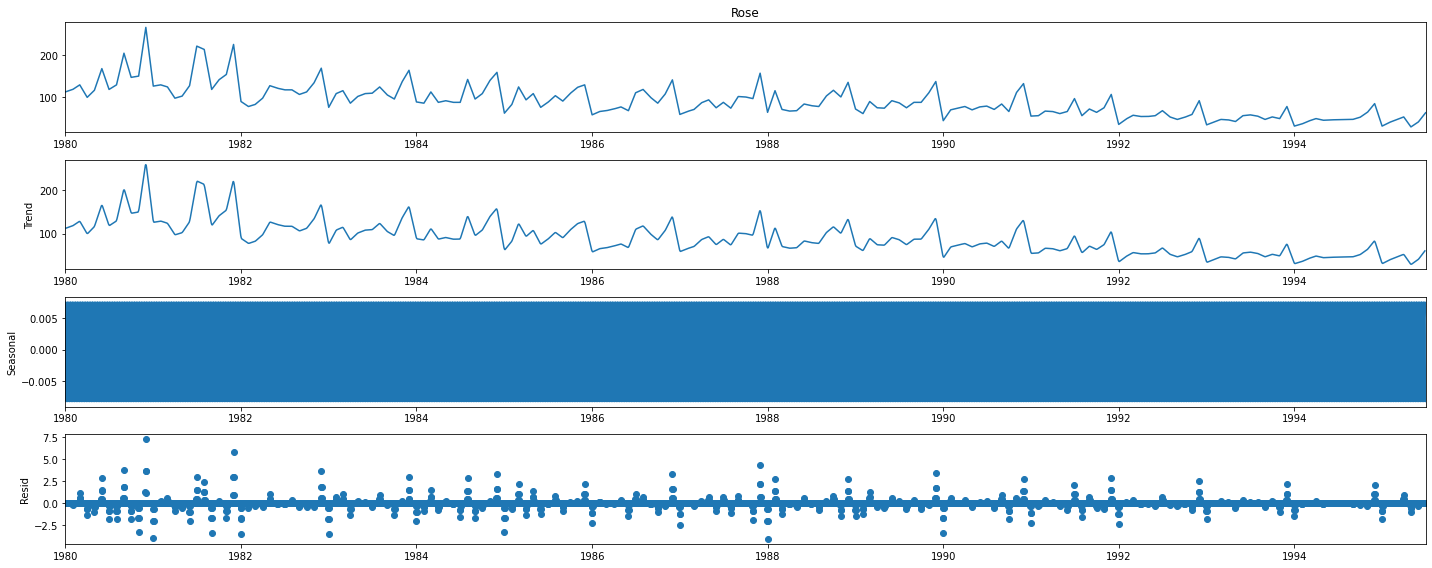

In [47]:
Rose_Add_decomposition = seasonal_decompose(df1,model='additive')
Rose_Add_decomposition.plot();

In [48]:
rose_trend = Sprinkle_Add_decomposition.trend
rose_seasonality = Sprinkle_Add_decomposition.seasonal
rose_residual = Sprinkle_Add_decomposition.resid

print('Trend','\n',rose_trend.head(12),'\n')
print('Seasonality','\n',rose_seasonality.head(12),'\n')
print('Residual','\n',rose_residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


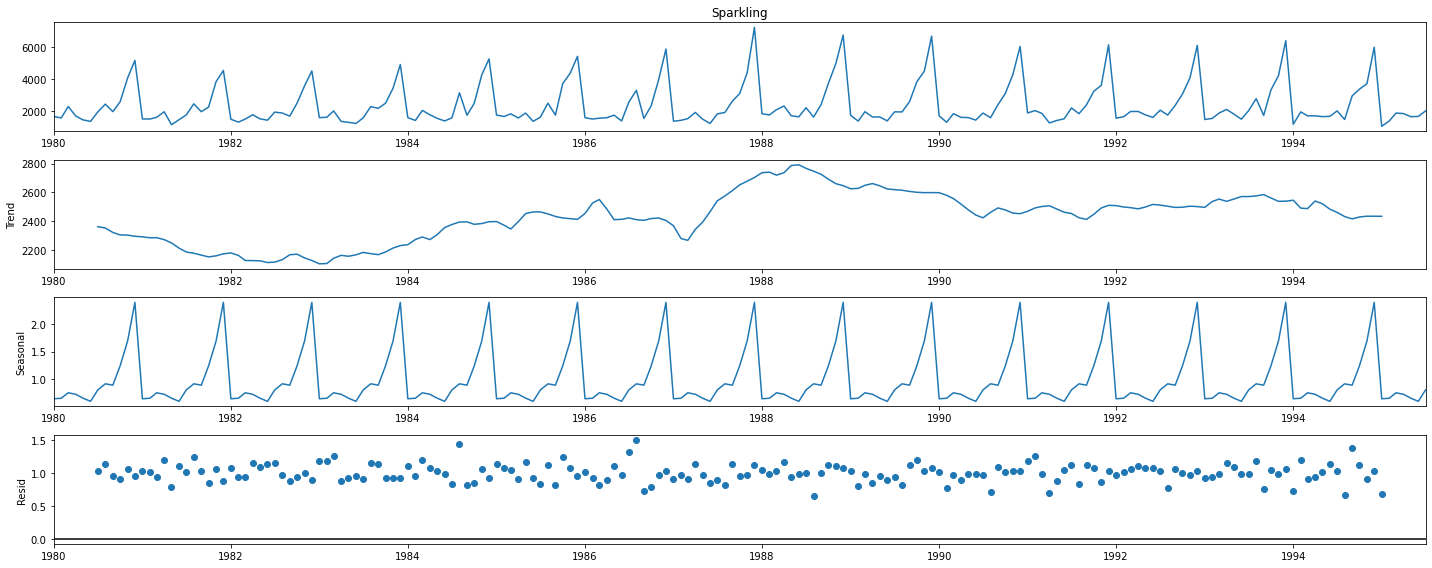

In [49]:
Sparkle_Mul_decomposition = seasonal_decompose(df,model='multiplicative')
Sparkle_Mul_decomposition.plot();

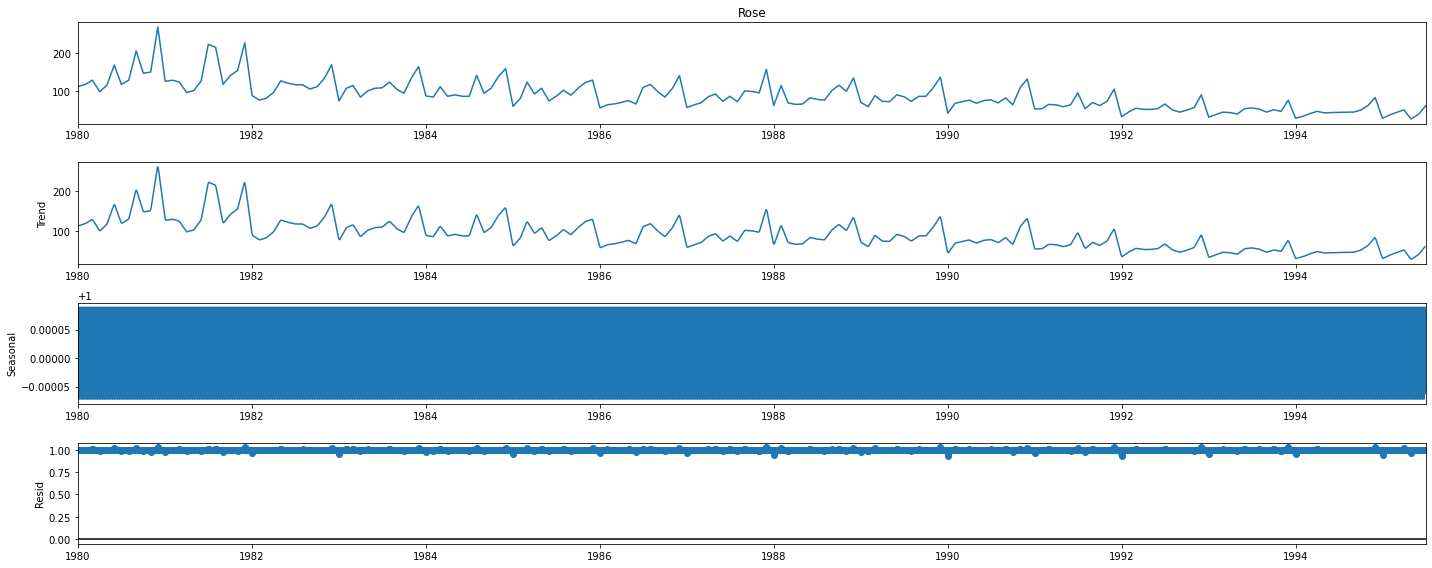

In [50]:
Rose_Mul_decomposition = seasonal_decompose(df1,model='multiplicative')
Rose_Mul_decomposition.plot();

### The Autocorrelation function plots 

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

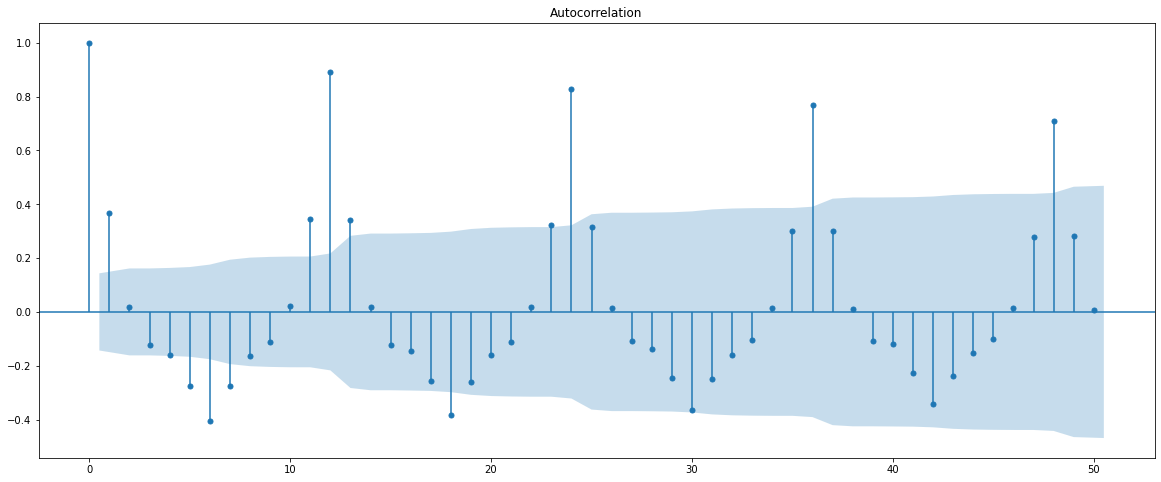

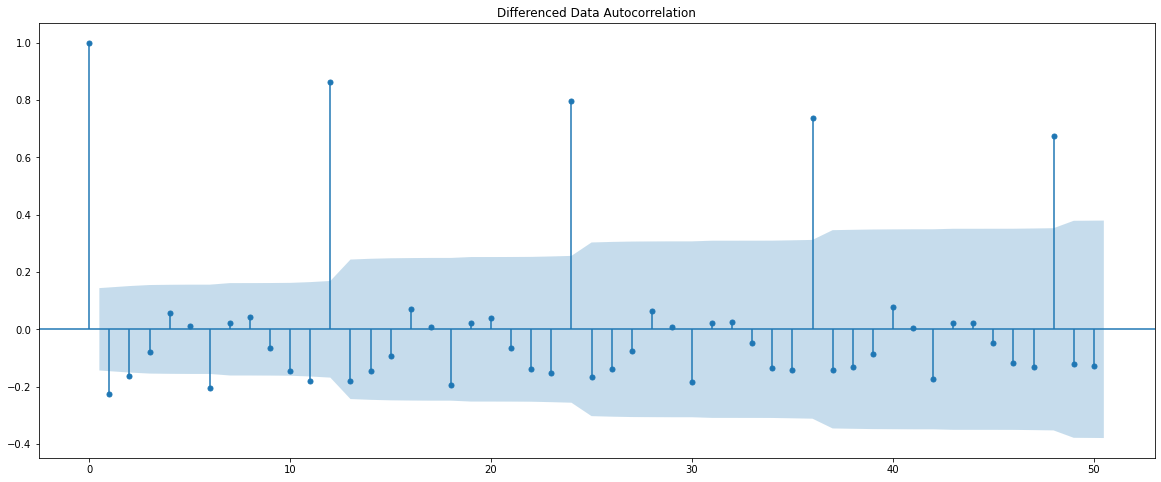

In [52]:
plot_acf(df,lags=50)
plot_acf(df.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

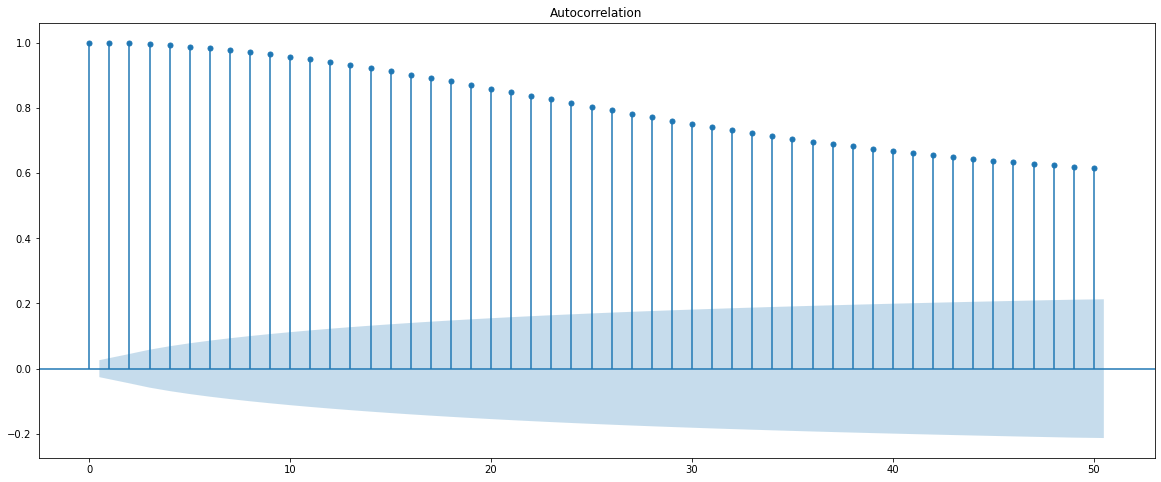

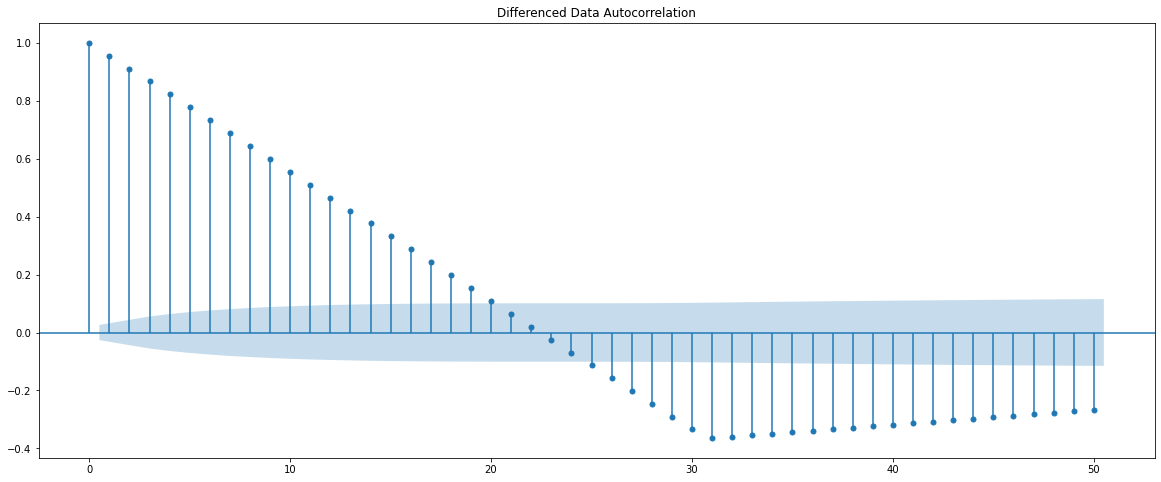

In [53]:
plot_acf(df1,lags=50)
plot_acf(df1.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

## 3. Split the data into training and test. The test data should start in 1991.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [54]:
train = df2[df2.index.year < 1991]
test = df2[df2.index.year >= 1990]

In [55]:
print('TARIN HEAD - First few rows of Training Data ')
display(train.head())
print('TRAIN TAIL - Last few rows of Training Data')
display(train.tail())
print('TEST HEAD - First few rows of Test Data')
display(test.head())
print('TEST TAIL- Last few rows of Test Data')
display(test.tail())

TARIN HEAD - First few rows of Training Data 


Sparkling   Rose
YearMonth                   
1980-01-01       1686  112.0
1980-02-01       1591  118.0
1980-03-01       2304  129.0
1980-04-01       1712   99.0
1980-05-01       1471  116.0

TRAIN TAIL - Last few rows of Training Data


Sparkling   Rose
YearMonth                   
1990-08-01       1605   70.0
1990-09-01       2424   83.0
1990-10-01       3116   65.0
1990-11-01       4286  110.0
1990-12-01       6047  132.0

TEST HEAD - First few rows of Test Data


Sparkling  Rose
YearMonth                  
1990-01-01       1720  43.0
1990-02-01       1321  69.0
1990-03-01       1859  73.0
1990-04-01       1628  77.0
1990-05-01       1615  69.0

TEST TAIL- Last few rows of Test Data


Sparkling  Rose
YearMonth                  
1995-03-01       1897  45.0
1995-04-01       1862  52.0
1995-05-01       1670  28.0
1995-06-01       1688  40.0
1995-07-01       2031  62.0

In [56]:
print(train.shape)
print(test.shape)

(132, 2)
(67, 2)


## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE

## Building different models and comparing the accuracy metrics.

### Simple Exponential Smoothing

In [57]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [58]:
SES_train_rose=df1[df1.index.year < 1991].to_frame()
SES_test_rose=df1[df1.index.year >= 1991].to_frame()

SES_train_sparkling=df[df.index.year < 1991].to_frame()
SES_test_sparkling=df[df.index.year >= 1991].to_frame()

In [59]:
model_SES_rose = SimpleExpSmoothing(SES_train_rose)
model_SES_autofit_rose = model_SES_rose.fit()
model_SES_autofit_rose.params

{'smoothing_level': 0.9999999850985869,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 111.99999970076577,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
SES_test_rose['predict'] = model_SES_autofit_rose.forecast(steps=len(SES_test_rose))
SES_test_rose.head()

Rose    predict
YearMonth                       
1991-01-01  54.000000  56.516129
1991-01-02  54.032258  56.516129
1991-01-03  54.064516  56.516129
1991-01-04  54.096774  56.516129
1991-01-05  54.129032  56.516129

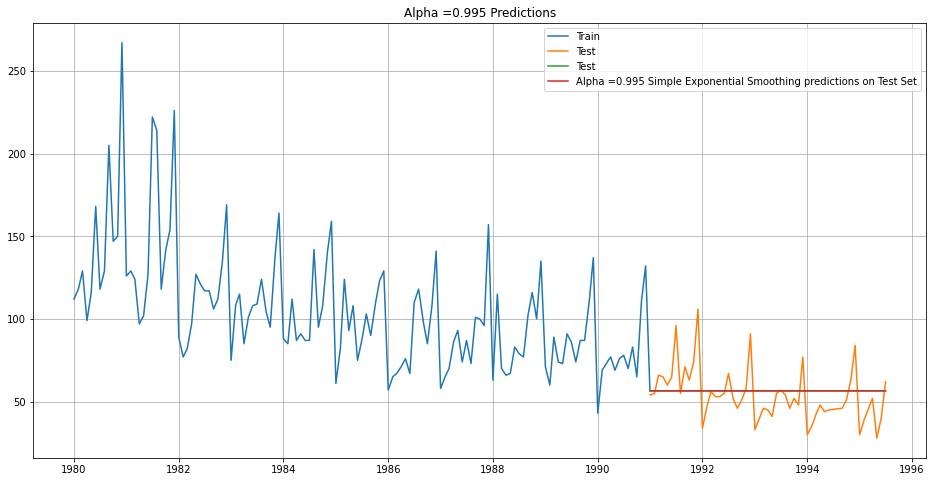

In [61]:
plt.figure(figsize=(16,8))
plt.plot(SES_train_rose, label='Train')
plt.plot(SES_test_rose, label='Test')

plt.plot(SES_test_rose['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [62]:
model_SES_sparkling = SimpleExpSmoothing(SES_train_sparkling)
model_SES_autofit_sparkling = model_SES_sparkling.fit()
model_SES_autofit_sparkling.params

SES_test_sparkling['predict'] = model_SES_autofit_sparkling.forecast(steps=len(SES_test_sparkling))
SES_test_sparkling.head()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.929339
1991-02-01       2049  2724.929339
1991-03-01       1874  2724.929339
1991-04-01       1279  2724.929339
1991-05-01       1432  2724.929339

In [63]:
model_SES_autofit_sparkling.params

{'smoothing_level': 0.04960659884563118,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047543457245,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

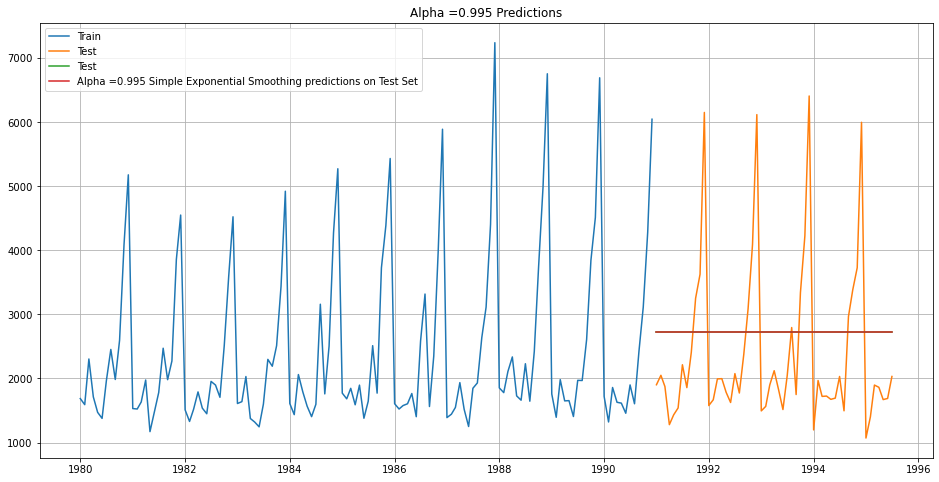

In [64]:
plt.figure(figsize=(16,8))
plt.plot(SES_train_sparkling, label='Train')
plt.plot(SES_test_sparkling, label='Test')

plt.plot(SES_test_sparkling['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

### RMSE Calculations

In [65]:
## Test Data
from sklearn import metrics
rmse_SES_rose = metrics.mean_squared_error(SES_test_rose['Rose'],SES_test_rose['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES_rose))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 13.719


In [66]:

rmse_SES_sparkling = metrics.mean_squared_error(SES_test_sparkling['Sparkling'],SES_test_sparkling['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES_sparkling))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


#### Storing the RSME

In [67]:
result_SES_rose = pd.DataFrame({'Test RMSE': [rmse_SES_rose]},index=['Alpha=0.995,Simple Exponential Smoothing'])

result_SES_rose

Test RMSE
Alpha=0.995,Simple Exponential Smoothing  13.719236

In [68]:
result_SES_sparkling = pd.DataFrame({'Test RMSE': [rmse_SES_sparkling]},index=['Alpha=0.995,Simple Exponential Smoothing'])

result_SES_sparkling

Test RMSE
Alpha=0.995,Simple Exponential Smoothing  1316.034674

### Calculating RMSE values for other Alpha Values

In [69]:
SES_rose_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})


for i in np.arange(0.3,1,0.1):
    model_SES_rose_alpha_i = model_SES_rose.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_rose['predict',i] = model_SES_rose_alpha_i.fittedvalues
    SES_test_rose['predict',i] = model_SES_rose_alpha_i.forecast(steps=len(SES_test_rose))
    
    rmse_train_rose_i = metrics.mean_squared_error(SES_train_rose['Rose'],SES_train_rose['predict',i],squared=False)
    
    rmse_test_rose_i = metrics.mean_squared_error(SES_test_rose['Rose'],SES_test_rose['predict',i],squared=False)
    
    SES_rose_6 = SES_rose_6.append({'Alpha Values':i,'Train RMSE':rmse_train_rose_i 
                                      ,'Test RMSE':rmse_test_rose_i}, ignore_index=True)

In [70]:
SES_rose_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
6           0.9    1.424513  13.777538
5           0.8    1.594843  13.858004
4           0.7    1.812614  13.973627
3           0.6    2.100427  14.148531
2           0.5    2.498015  14.431665
1           0.4    3.082049  14.934821
0           0.3    4.021148  15.959539

In [71]:
SES_sparkling_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})


for i in np.arange(0.3,1,0.1):
    model_SES_sparkling_alpha_i = model_SES_sparkling.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_sparkling['predict',i] = model_SES_sparkling_alpha_i.fittedvalues
    SES_test_sparkling['predict',i] = model_SES_sparkling_alpha_i.forecast(steps=len(SES_test_rose))
    
    rmse_train_sparkling_i = metrics.mean_squared_error(SES_train_sparkling['Sparkling'],SES_train_sparkling['predict',i],squared=False)
    
    rmse_test_sparkling_i = metrics.mean_squared_error(SES_test_sparkling['Sparkling'],SES_test_sparkling['predict',i],squared=False)
    
    SES_sparkling_6 = SES_sparkling_6.append({'Alpha Values':i,'Train RMSE':rmse_train_sparkling_i 
                                      ,'Test RMSE':rmse_test_sparkling_i}, ignore_index=True)

In [72]:
SES_sparkling_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.3  1359.511747  1935.507132
1           0.4  1352.588879  2311.919615
2           0.5  1344.004369  2666.351413
3           0.6  1338.805381  2979.204388
4           0.7  1338.844308  3249.944092
5           0.8  1344.462091  3483.801006
6           0.9  1355.723518  3686.794285

In [73]:
result_SES_sparkling_03 = pd.DataFrame({'Test RMSE': [SES_sparkling_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])
    

results_SES_alpha_sparkling = pd.concat([result_SES_sparkling_03, result_SES_sparkling])
results_SES_alpha_sparkling

Test RMSE
Alpha=0.3,SimpleExponentialSmoothing      1935.507132
Alpha=0.995,Simple Exponential Smoothing  1316.034674

### Double Exponential Smoothing (Holt's Model)

In [74]:
DES_train = train.copy()
DES_test = test.copy()

In [75]:
DES_test.isnull().sum()

Sparkling    0
Rose         0
dtype: int64

In [76]:
print(DES_test.isna().sum())

Sparkling    0
Rose         0
dtype: int64


In [77]:
## First we will define an empty dataframe to store our values from the loop

DES_rose = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})


In [78]:
DES_test

Sparkling  Rose
YearMonth                  
1990-01-01       1720  43.0
1990-02-01       1321  69.0
1990-03-01       1859  73.0
1990-04-01       1628  77.0
1990-05-01       1615  69.0
...               ...   ...
1995-03-01       1897  45.0
1995-04-01       1862  52.0
1995-05-01       1670  28.0
1995-06-01       1688  40.0
1995-07-01       2031  62.0

[67 rows x 2 columns]

In [79]:
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5]
beta_list = [0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize a results dataframe to store the RMSE values for each combination of alpha and beta
results_df = pd.DataFrame(columns=['Alpha', 'Beta', 'RMSE'])

# Loop over each combination of alpha and beta and fit the model to the training data
for alpha in alpha_list:
    for beta in beta_list:
        model = Holt(DES_train['Rose']).fit(smoothing_level=alpha, smoothing_slope=beta)
        predictions = model.forecast(len(DES_test['Rose']))
        
        
        rmse = np.sqrt(metrics.mean_squared_error(DES_test['Rose'], predictions))
        results_df = results_df.append({'Alpha': alpha, 'Beta': beta, 'RMSE': rmse}, ignore_index=True)

        
        # Evaluate the model on the test data and store the RMSE value in the results dataframe
#         rmse = np.sqrt(metrics.mean_squared_error(DES_test['Rose'], predictions))
#         results_df = results_df.append({'Alpha': alpha, 'Beta': beta, 'RMSE': rmse}, ignore_index=True)


# Find the alpha and beta values that give the lowest RMSE
best_alpha = results_df.loc[results_df['RMSE'].idxmin(), 'Alpha']
best_beta = results_df.loc[results_df['RMSE'].idxmin(), 'Beta']

print('Best alpha:', best_alpha)
print('Best beta:', best_beta)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information 

Best alpha: 0.1
Best beta: 0.1


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information 

In [80]:
model = Holt(train['Rose']).fit(smoothing_level=0.1, smoothing_slope=0.1)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [81]:
predictions1 = model.forecast(len(DES_test))

In [82]:
rmse = np.sqrt(metrics.mean_squared_error(DES_test['Rose'], predictions1))
print('RMSE:', rmse)

RMSE: 35.9192386246999


In [83]:
results_DES_rose = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf_DES_rose = pd.concat([results_DES_rose,result_SES_rose])
resultsDf_DES_rose

Test RMSE
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  35.919239
Alpha=0.995,Simple Exponential Smoothing       13.719236

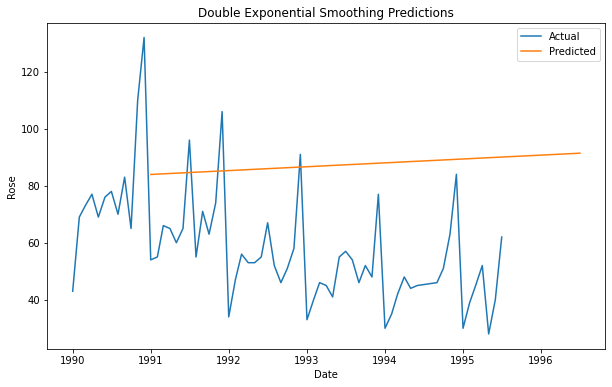

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(DES_test['Rose'], label='Actual')
plt.plot(predictions1, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Rose')
plt.title('Double Exponential Smoothing Predictions')
plt.legend()
plt.show()

In [85]:
# def predict_sales(alpha, beta, train_data, test_data):
#     model = ExponentialSmoothing(DES_train, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=alpha, smoothing_slope=beta)
#     predictions = model.forecast(len(DES_test['Rose']))
#     return predictions

In [86]:
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5]
beta_list = [0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize a results dataframe to store the RMSE values for each combination of alpha and beta
results_df = pd.DataFrame(columns=['Alpha', 'Beta', 'RMSE'])

# Loop over each combination of alpha and beta and fit the model to the training data
for alpha in alpha_list:
    for beta in beta_list:
        model = Holt(DES_train['Sparkling']).fit(smoothing_level=alpha, smoothing_slope=beta)
        predictions = model.forecast(len(DES_test['Sparkling']))
        
        
        rmse = np.sqrt(metrics.mean_squared_error(DES_test['Sparkling'], predictions))
        results_df = results_df.append({'Alpha': alpha, 'Beta': beta, 'RMSE': rmse}, ignore_index=True)

        
        # Evaluate the model on the test data and store the RMSE value in the results dataframe
#         rmse = np.sqrt(metrics.mean_squared_error(DES_test['Rose'], predictions))
#         results_df = results_df.append({'Alpha': alpha, 'Beta': beta, 'RMSE': rmse}, ignore_index=True)


# Find the alpha and beta values that give the lowest RMSE
best_alpha = results_df.loc[results_df['RMSE'].idxmin(), 'Alpha']
best_beta = results_df.loc[results_df['RMSE'].idxmin(), 'Beta']

print('Best alpha:', best_alpha)
print('Best beta:', best_beta)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information 

Best alpha: 0.1
Best beta: 0.1


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [87]:
model = Holt(train['Sparkling']).fit(smoothing_level=0.1, smoothing_slope=0.1)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [88]:
predictions = model.forecast(len(DES_test))

In [89]:
rmse = np.sqrt(metrics.mean_squared_error(DES_test['Sparkling'], predictions))
print('RMSE:', rmse)

RMSE: 1916.3448708981375


In [90]:
results_DES_sparkling = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf_DES_sparkling = pd.concat([results_SES_alpha_sparkling,results_DES_sparkling])
resultsDf_DES_sparkling

Test RMSE
Alpha=0.3,SimpleExponentialSmoothing           1935.507132
Alpha=0.995,Simple Exponential Smoothing       1316.034674
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1916.344871

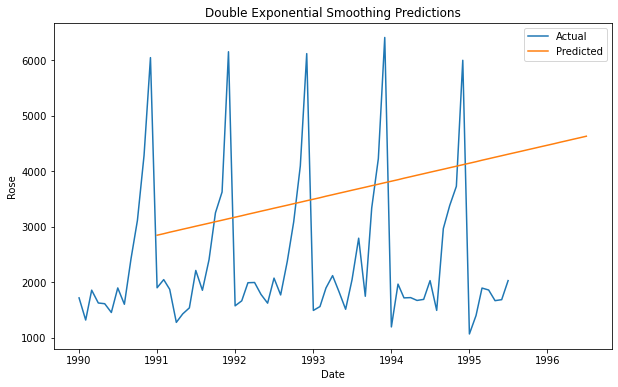

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(DES_test['Sparkling'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Rose')
plt.title('Double Exponential Smoothing Predictions')
plt.legend()
plt.show()

### Triple Exponential Smoothing (Holt - Winter's Model)

In [92]:
TES_train = train.copy()
TES_test = test.copy()

In [93]:
model_TES_rose = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [94]:
model_TES_fit_rose = model_TES_rose.fit()

# Make predictions
pred_TES_rose = model_TES_fit_rose.forecast(len(TES_test))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse_TES = np.sqrt(mean_squared_error(TES_test['Rose'], pred_TES_rose))

print(f"RMSE: {rmse_TES:.2f}")

RMSE: 17.25


In [95]:
model_TES_fit_rose.params

{'smoothing_level': 0.06571007449183297,
 'smoothing_trend': 0.051867105713176015,
 'smoothing_seasonal': 0.0015637515713898,
 'damping_trend': nan,
 'initial_level': 47.81887301367471,
 'initial_trend': -0.2961562797665537,
 'initial_seasons': array([2.35763018, 2.67367218, 2.92146068, 2.55308191, 2.87099548,
        3.13124987, 3.44178442, 3.66118656, 3.47154364, 3.39670325,
        3.95879831, 5.46173463]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

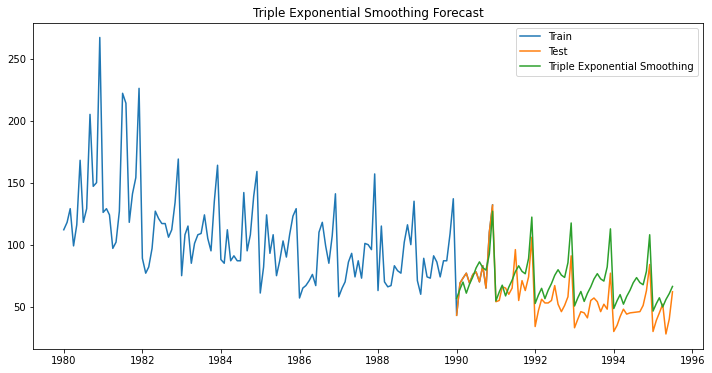

In [96]:
plt.figure(figsize=(12,6))
plt.plot(TES_train.index, TES_train['Rose'], label='Train')
plt.plot(TES_test.index, TES_test['Rose'], label='Test')
plt.plot(TES_test.index, pred_TES_rose, label='Triple Exponential Smoothing')
plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Forecast')
plt.show()

In [97]:
results_TES_rose = pd.DataFrame({'Test RMSE': [rmse_TES]}
                           ,index=['Alpha=0.06,Beta=0.05,TripleExponentialSmoothing'])

resultsDf_TES_rose = pd.concat([results_TES_rose,resultsDf_DES_rose])
resultsDf_TES_rose

Test RMSE
Alpha=0.06,Beta=0.05,TripleExponentialSmoothing  17.250761
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing    35.919239
Alpha=0.995,Simple Exponential Smoothing         13.719236

In [98]:
model_TES_sparkling = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [99]:
model_TES_fit_sparkling = model_TES_sparkling.fit()

# Make predictions
pred_TES_sparkling = model_TES_fit_sparkling.forecast(len(TES_test))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse_TES = np.sqrt(mean_squared_error(TES_test['Sparkling'], pred_TES_sparkling))

print(f"RMSE: {rmse_TES:.2f}")

RMSE: 496.57


In [100]:
model_TES_fit_sparkling.params

{'smoothing_level': 0.11057044018305404,
 'smoothing_trend': 0.06076609768412894,
 'smoothing_seasonal': 0.39187601902826213,
 'damping_trend': nan,
 'initial_level': 1621.806699459997,
 'initial_trend': -8.175193580026457,
 'initial_seasons': array([1.07304448, 1.02730389, 1.39469706, 1.20333193, 0.98008967,
        0.97664181, 1.39261648, 1.70888984, 1.37519684, 1.81953245,
        2.82880203, 3.59142504]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

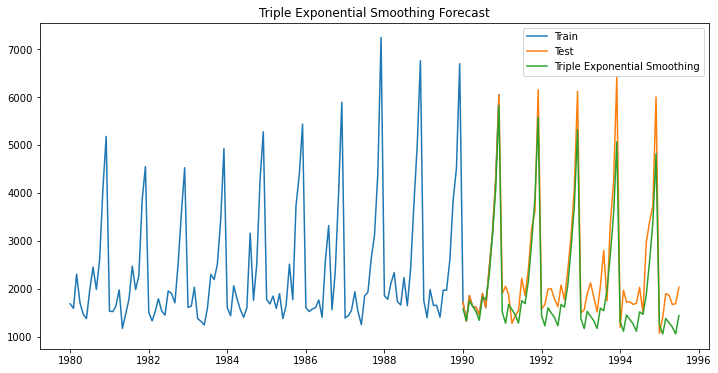

In [101]:
plt.figure(figsize=(12,6))
plt.plot(TES_train.index, TES_train['Sparkling'], label='Train')
plt.plot(TES_test.index, TES_test['Sparkling'], label='Test')
plt.plot(TES_test.index, pred_TES_sparkling, label='Triple Exponential Smoothing')
plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Forecast')
plt.show()

In [102]:
results_TES_sparkling = pd.DataFrame({'Test RMSE': [rmse_TES]}
                           ,index=['Alpha=0.1,Beta=0.06,TripleExponentialSmoothing'])

resultsDf_TES_sparkling = pd.concat([results_TES_sparkling,resultsDf_DES_sparkling])
resultsDf_TES_sparkling

Test RMSE
Alpha=0.1,Beta=0.06,TripleExponentialSmoothing   496.574476
Alpha=0.3,SimpleExponentialSmoothing            1935.507132
Alpha=0.995,Simple Exponential Smoothing        1316.034674
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing   1916.344871

### Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [105]:
len(train)

132

In [106]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)


LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time


Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


In [107]:
lr = LinearRegression()

In [108]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

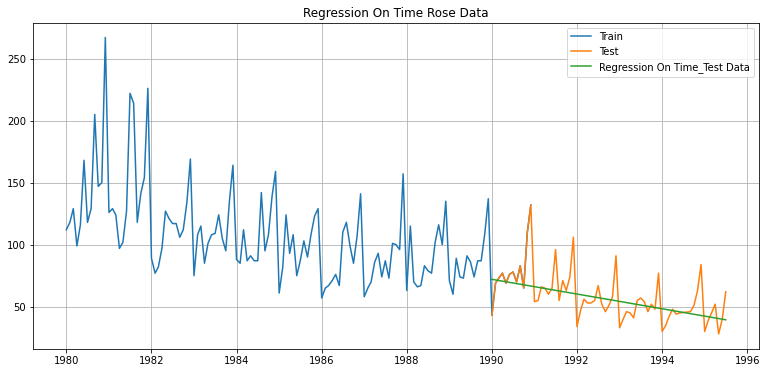

In [109]:
test_predictions_rose = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_rose

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Regression On Time Rose Data')
plt.grid();

In [110]:
lr1 = LinearRegression()

In [111]:
lr1.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

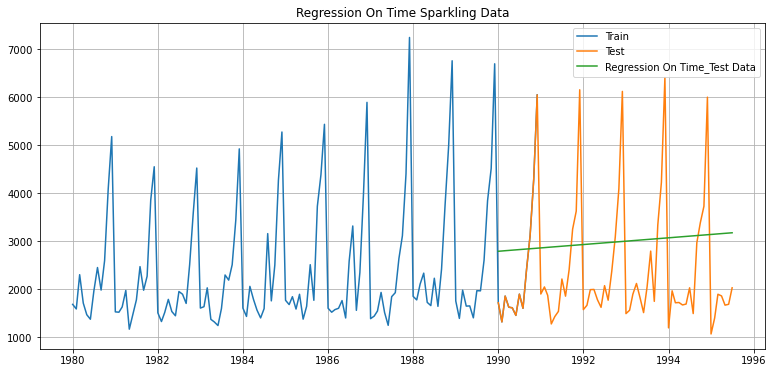

In [112]:
test_predictions_sparkling = lr1.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_sparkling

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Regression On Time Sparkling Data')
plt.legend(loc='best')
plt.grid();

In [113]:

rmse_lr_rose = metrics.mean_squared_error(test['Rose'],test_predictions_rose,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_lr_rose))

For RegressionOnTime forecast on the Test Data,  RMSE is 16.817


In [114]:
resultsDf_lr_rose = pd.DataFrame({'Test RMSE': [rmse_lr_rose]},index=['RegressionOnTime'])

results_lr_rose = pd.concat([resultsDf_TES_rose, resultsDf_lr_rose])
results_lr_rose

Test RMSE
Alpha=0.06,Beta=0.05,TripleExponentialSmoothing  17.250761
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing    35.919239
Alpha=0.995,Simple Exponential Smoothing         13.719236
RegressionOnTime                                 16.816602

In [115]:

rmse_lr_sparkling = metrics.mean_squared_error(test['Sparkling'],test_predictions_sparkling,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_lr_sparkling))

For RegressionOnTime forecast on the Test Data,  RMSE is 1416.381


In [116]:
resultsDf_lr_sparkling = pd.DataFrame({'Test RMSE': [rmse_lr_sparkling]},index=['RegressionOnTime'])

results_lr_sparkling = pd.concat([resultsDf_TES_sparkling, resultsDf_lr_sparkling])
results_lr_sparkling

Test RMSE
Alpha=0.1,Beta=0.06,TripleExponentialSmoothing   496.574476
Alpha=0.3,SimpleExponentialSmoothing            1935.507132
Alpha=0.995,Simple Exponential Smoothing        1316.034674
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing   1916.344871
RegressionOnTime                                1416.381017

## Naive Approach: $\hat{y}_{t+1} = y_t$

In [117]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [118]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1990-01-01    132.0
1990-02-01    132.0
1990-03-01    132.0
1990-04-01    132.0
1990-05-01    132.0
Name: naive, dtype: float64

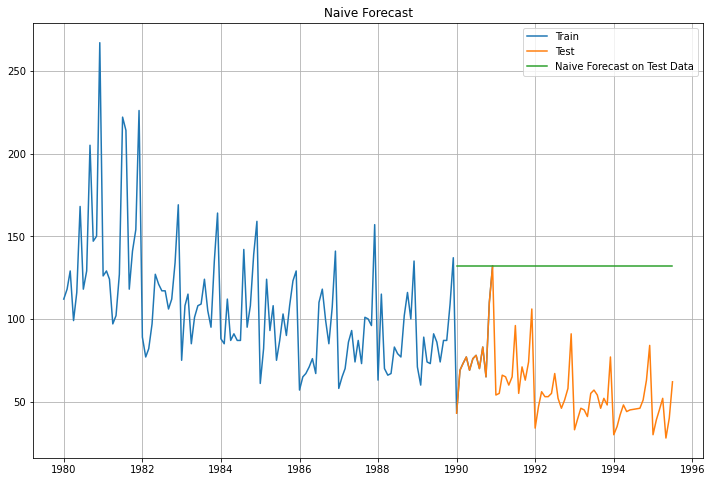

In [119]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [120]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1990-01-01    6047
1990-02-01    6047
1990-03-01    6047
1990-04-01    6047
1990-05-01    6047
Name: naive, dtype: int64

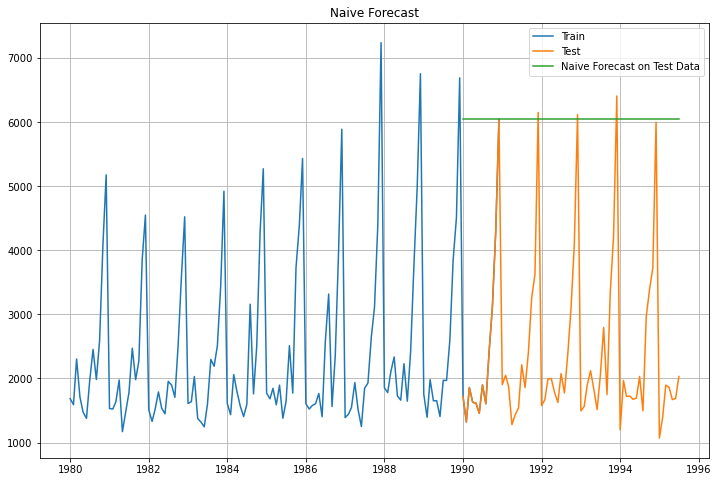

In [121]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [122]:

rmse_NB_rose = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For NAive approach forecast on the Test Data,  RMSE is %3.3f" %(rmse_NB_rose))

For NAive approach forecast on the Test Data,  RMSE is 5988.718


In [123]:
resultsDf_NB_rose = pd.DataFrame({'Test RMSE': [rmse_NB_rose]},index=['NaiveModel'])

resultsDf_NB_rose = pd.concat([results_lr_rose, resultsDf_NB_rose])
resultsDf_NB_rose

Test RMSE
Alpha=0.06,Beta=0.05,TripleExponentialSmoothing    17.250761
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing      35.919239
Alpha=0.995,Simple Exponential Smoothing           13.719236
RegressionOnTime                                   16.816602
NaiveModel                                       5988.718349

In [124]:

rmse_NB_sparkling = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NAive approach  forecast on the Test Data,  RMSE is %3.3f" %(rmse_NB_sparkling))

For NAive approach  forecast on the Test Data,  RMSE is 3866.980


In [125]:
resultsDf_NB_sparkling = pd.DataFrame({'Test RMSE': [rmse_NB_sparkling]},index=['NaiveModel'])

resultsDf_NB_sparkling = pd.concat([results_lr_sparkling, resultsDf_NB_sparkling])
resultsDf_NB_sparkling

Test RMSE
Alpha=0.1,Beta=0.06,TripleExponentialSmoothing   496.574476
Alpha=0.3,SimpleExponentialSmoothing            1935.507132
Alpha=0.995,Simple Exponential Smoothing        1316.034674
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing   1916.344871
RegressionOnTime                                1416.381017
NaiveModel                                      3866.980258

### Simple Average

In [126]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [127]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Sparkling  Rose  mean_forecast
YearMonth                                 
1990-01-01       1720  43.0     104.939394
1990-02-01       1321  69.0     104.939394
1990-03-01       1859  73.0     104.939394
1990-04-01       1628  77.0     104.939394
1990-05-01       1615  69.0     104.939394

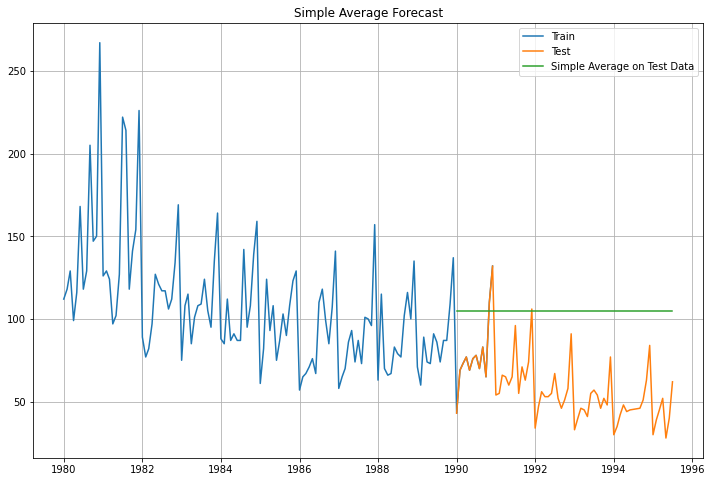

In [128]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [129]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  Rose  mean_forecast
YearMonth                                 
1990-01-01       1720  43.0    2403.780303
1990-02-01       1321  69.0    2403.780303
1990-03-01       1859  73.0    2403.780303
1990-04-01       1628  77.0    2403.780303
1990-05-01       1615  69.0    2403.780303

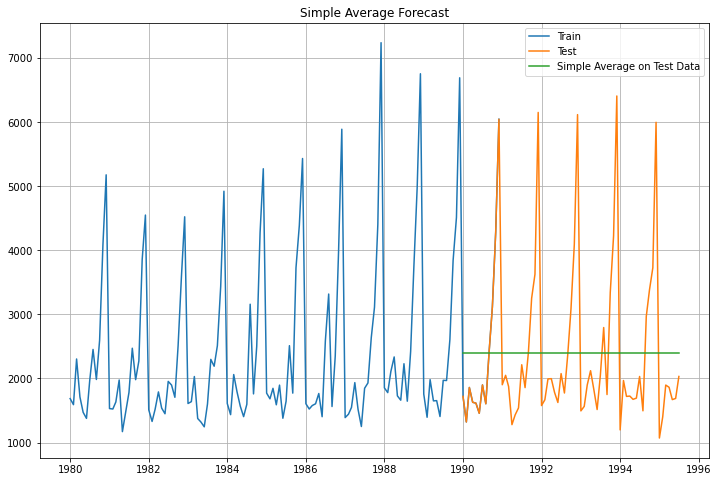

In [130]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [131]:

rmse_SA_rose = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_SA_rose))

For Simple Average forecast on the Test Data,  RMSE is 2345.548


In [132]:
results_SA_rose = pd.DataFrame({'Test RMSE': [rmse_SA_rose]},index=['SimpleAverageModel'])

resultsDf_SA_rose = pd.concat([resultsDf_NB_rose, results_SA_rose])
resultsDf_SA_rose

Test RMSE
Alpha=0.06,Beta=0.05,TripleExponentialSmoothing    17.250761
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing      35.919239
Alpha=0.995,Simple Exponential Smoothing           13.719236
RegressionOnTime                                   16.816602
NaiveModel                                       5988.718349
SimpleAverageModel                               2345.547766

In [133]:

rmse_SA_sparkling = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_SA_sparkling))

For Simple Average forecast on the Test Data,  RMSE is 1291.154


In [134]:
results_SA_sparkling = pd.DataFrame({'Test RMSE': [rmse_SA_sparkling]},index=['SimpleAverageModel'])

resultsDf_SA_sparkling = pd.concat([resultsDf_NB_sparkling, results_SA_sparkling])
resultsDf_SA_sparkling

Test RMSE
Alpha=0.1,Beta=0.06,TripleExponentialSmoothing   496.574476
Alpha=0.3,SimpleExponentialSmoothing            1935.507132
Alpha=0.995,Simple Exponential Smoothing        1316.034674
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing   1916.344871
RegressionOnTime                                1416.381017
NaiveModel                                      3866.980258
SimpleAverageModel                              1291.154318

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity 

In [135]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

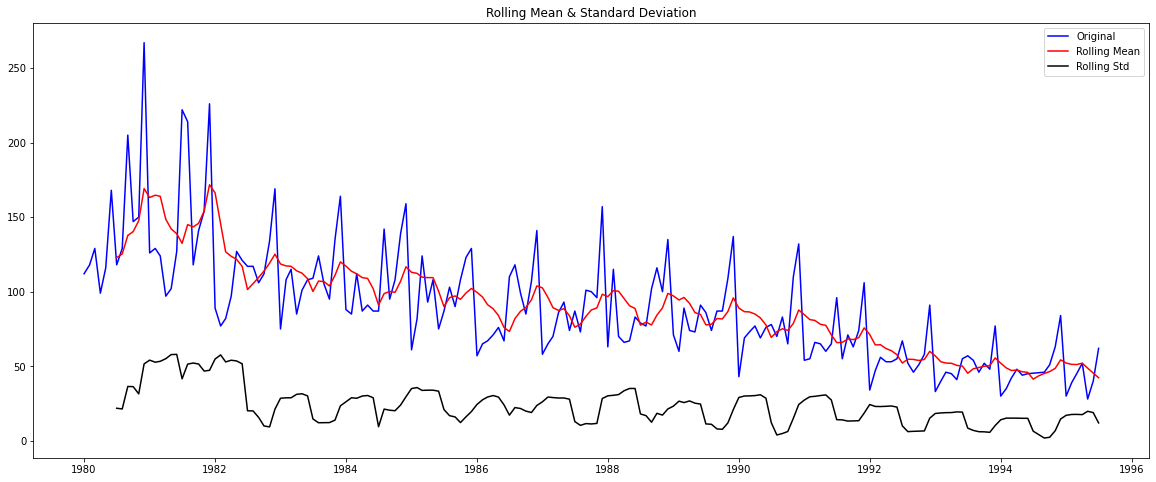

Results of Dickey-Fuller Test:
Test Statistic                  -1.876691
p-value                          0.343105
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [136]:
test_stationarity(df2['Rose'])


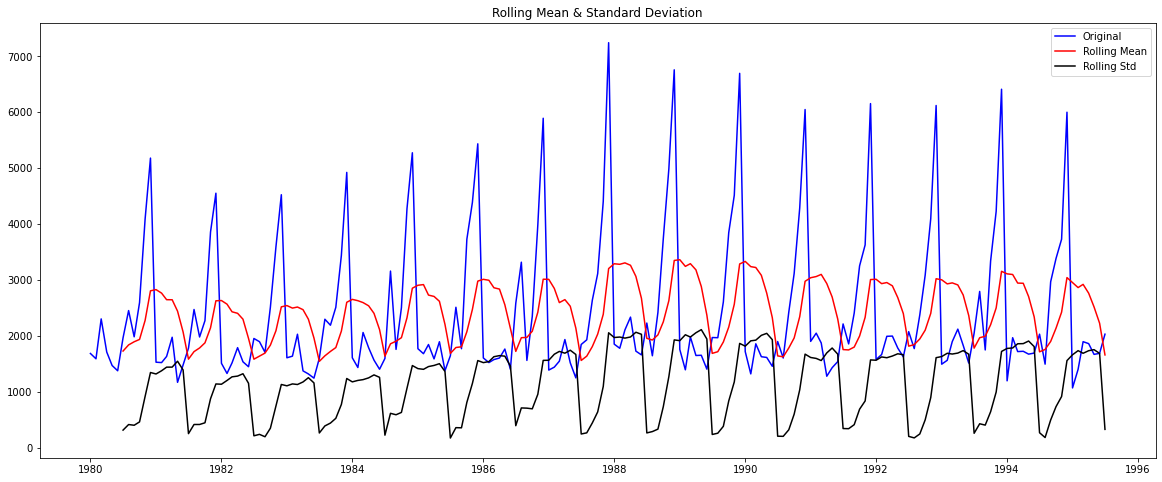

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [137]:
test_stationarity(df2['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

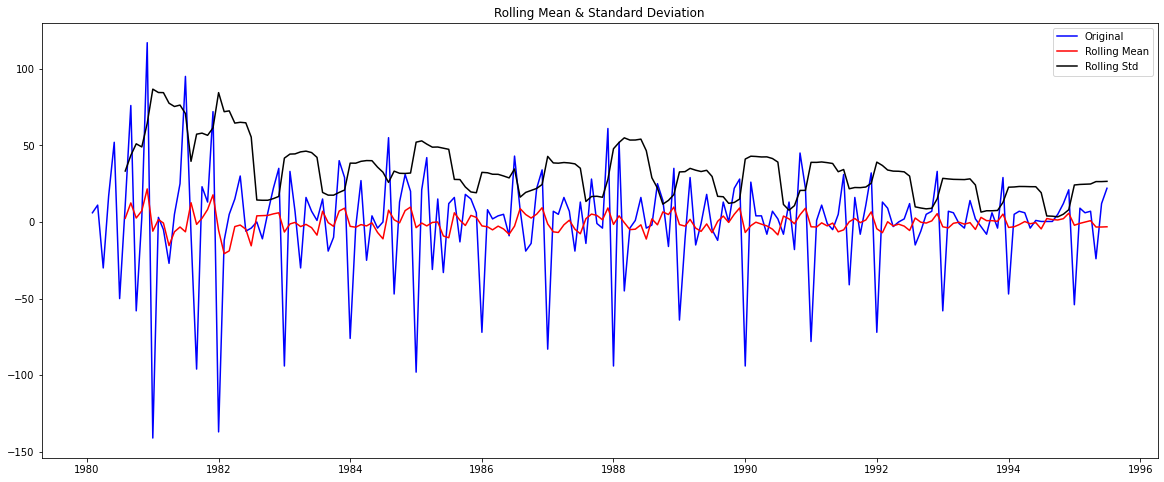

Results of Dickey-Fuller Test:
Test Statistic                -8.044389e+00
p-value                        1.810924e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [138]:
test_stationarity(df2['Rose'].diff().dropna())

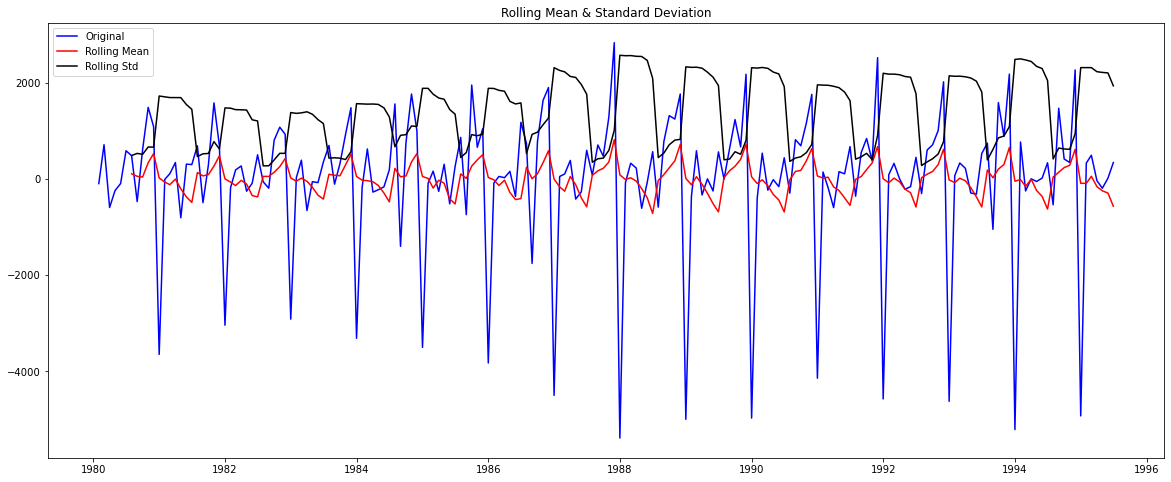

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [139]:
test_stationarity(df2['Sparkling'].diff().dropna())

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [140]:
import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
We have kept the value of d as 0 as we necessary for an ARMA model 


In [141]:
from statsmodels.tsa.arima.model import ARIMA

ARIMA_AIC_Rose = pd.DataFrame(columns=['param', 'AIC'])

for param in pdq:
    ARIMA_model_rose = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_rose.aic))
    ARIMA_AIC_Rose = ARIMA_AIC_Rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:1324.899702958276
ARIMA(0, 0, 1) - AIC:1305.4684058451614
ARIMA(0, 0, 2) - AIC:1306.587015380645
ARIMA(1, 0, 0) - AIC:1301.5463044401138
ARIMA(1, 0, 1) - AIC:1294.510585300984
ARIMA(1, 0, 2) - AIC:1292.053213107305
ARIMA(2, 0, 0) - AIC:1302.3476849759072
ARIMA(2, 0, 1) - AIC:1292.9371947698364
ARIMA(2, 0, 2) - AIC:1292.2480560240856


In [142]:
# ARMA_AIC_Sparkling = pd.DataFrame(columns=['param', 'AIC'])


# from statsmodels.tsa.arima.model import ARIMA

# for param in pdq:
#     ARMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
#     print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
#     ARMA_AIC_Sparkling = ARMA_AIC_Sparkling.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

In [143]:
ARIMA_AIC_Rose.sort_values(by='AIC',ascending=True)

param          AIC
5  (1, 0, 2)  1292.053213
8  (2, 0, 2)  1292.248056
7  (2, 0, 1)  1292.937195
4  (1, 0, 1)  1294.510585
3  (1, 0, 0)  1301.546304
6  (2, 0, 0)  1302.347685
1  (0, 0, 1)  1305.468406
2  (0, 0, 2)  1306.587015
0  (0, 0, 0)  1324.899703

In [144]:
# ARMA_AIC_Sparkling.sort_values(by='AIC',ascending=True)
train

Sparkling   Rose
YearMonth                   
1980-01-01       1686  112.0
1980-02-01       1591  118.0
1980-03-01       2304  129.0
1980-04-01       1712   99.0
1980-05-01       1471  116.0
...               ...    ...
1990-08-01       1605   70.0
1990-09-01       2424   83.0
1990-10-01       3116   65.0
1990-11-01       4286  110.0
1990-12-01       6047  132.0

[132 rows x 2 columns]

In [145]:

train = train.resample('M').mean()

auto_ARIMA_rose = ARIMA(train['Rose'], order=(1,0,2),freq='M')

results_auto_ARIMA_rose = auto_ARIMA_rose.fit()
print('===========================ROSE TRAIN MODEL===================================')
print('==============================================================================')
print(results_auto_ARIMA_rose.summary())

===========================ROSE TRAIN MODEL===================================
                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -641.027
Date:                Sun, 09 Apr 2023   AIC                           1292.053
Time:                        22:07:45   BIC                           1306.467
Sample:                    01-31-1980   HQIC                          1297.910
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.8405     24.779      4.352      0.000      59.275     156.406
ar.L1          0.9861      0.027     36.818      0.0

In [146]:
ARIMA_AIC_sparkling = pd.DataFrame(columns=['param', 'AIC'])

for param in pdq:
    ARIMA_model_sparkling = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_sparkling.aic))
    ARIMA_AIC_sparkling = ARIMA_AIC_sparkling.append({'param':param, 'AIC': ARIMA_model_sparkling.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:2271.2058190597454
ARIMA(0, 0, 1) - AIC:2245.3121356629804
ARIMA(0, 0, 2) - AIC:2245.3471842398094
ARIMA(1, 0, 0) - AIC:2247.3588287243665
ARIMA(1, 0, 1) - AIC:2246.005399728353
ARIMA(1, 0, 2) - AIC:2246.9357004523554
ARIMA(2, 0, 0) - AIC:2244.8117819003064
ARIMA(2, 0, 1) - AIC:2236.590860201013
ARIMA(2, 0, 2) - AIC:2248.2772806943367


In [147]:
ARIMA_AIC_sparkling.sort_values(by='AIC',ascending=True)

param          AIC
7  (2, 0, 1)  2236.590860
6  (2, 0, 0)  2244.811782
1  (0, 0, 1)  2245.312136
2  (0, 0, 2)  2245.347184
4  (1, 0, 1)  2246.005400
5  (1, 0, 2)  2246.935700
3  (1, 0, 0)  2247.358829
8  (2, 0, 2)  2248.277281
0  (0, 0, 0)  2271.205819

In [148]:
auto_ARIMA_sparkling = ARIMA(train['Sparkling'], order=(2,0,1),freq='M')

results_auto_ARIMA_sparkling = auto_ARIMA_sparkling.fit()
print('===========================SPARKLING TRAIN MODEL===================================')
print('==============================================================================')
print(results_auto_ARIMA_sparkling.summary())

===========================SPARKLING TRAIN MODEL===================================
                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1113.295
Date:                Sun, 09 Apr 2023   AIC                           2236.591
Time:                        22:07:46   BIC                           2251.005
Sample:                    01-31-1980   HQIC                          2242.448
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2399.4584    118.215     20.297      0.000    2167.762    2631.155
ar.L1          1.2375      0.138      8.938    

### Predict on the Test Set using this model and evaluate the model

In [149]:
predicted_auto_ARIMA_rose = results_auto_ARIMA_rose.forecast(steps=len(test))

In [150]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA_rose,squared=False)
print(rmse)

43.96421992441878


In [151]:
temp_results_rose = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(1,0,2)'])

resultsDf_ARIMA_rose = pd.concat([resultsDf_SA_rose, temp_results_rose])
resultsDf_ARIMA_rose

Test RMSE
Alpha=0.06,Beta=0.05,TripleExponentialSmoothing    17.250761
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing      35.919239
Alpha=0.995,Simple Exponential Smoothing           13.719236
RegressionOnTime                                   16.816602
NaiveModel                                       5988.718349
SimpleAverageModel                               2345.547766
ARIMA(1,0,2)                                       43.964220

In [152]:
temp_results_rose

Test RMSE
ARIMA(1,0,2)   43.96422

=========================================SPARKLING WINES=============================================

In [153]:
predicted_auto_ARIMA_sparkling = results_auto_ARIMA_sparkling.forecast(steps=len(test))

In [154]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA_sparkling,squared=False)
print(rmse)

1291.6339812432911


In [155]:
temp_results_sparkling = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,0,1)'])



resultsDf_ARIMA_sparkling = pd.concat([resultsDf_SA_sparkling, temp_results_sparkling])
resultsDf_ARIMA_sparkling

Test RMSE
Alpha=0.1,Beta=0.06,TripleExponentialSmoothing   496.574476
Alpha=0.3,SimpleExponentialSmoothing            1935.507132
Alpha=0.995,Simple Exponential Smoothing        1316.034674
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing   1916.344871
RegressionOnTime                                1416.381017
NaiveModel                                      3866.980258
SimpleAverageModel                              1291.154318
ARIMA(2,0,1)                                    1291.633981

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

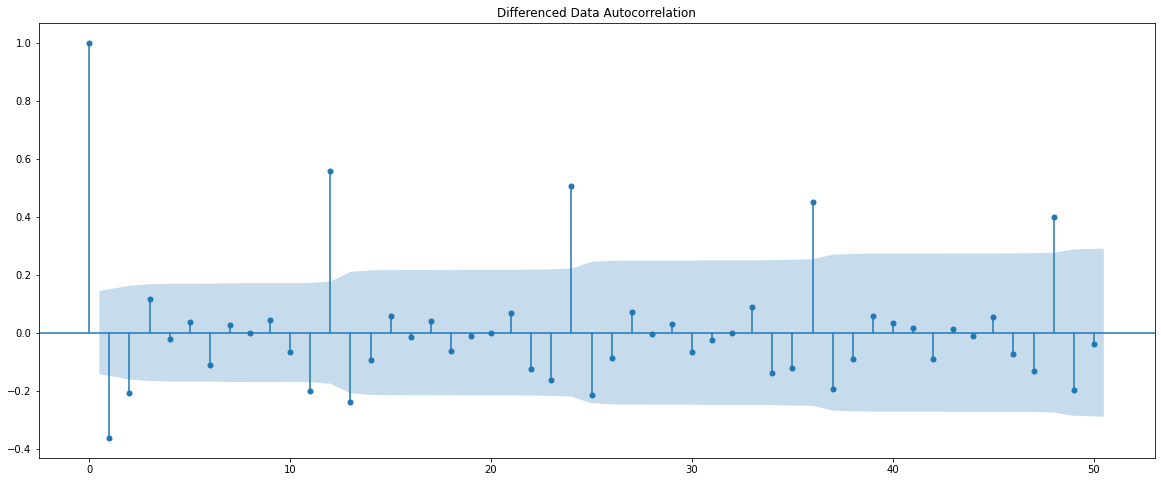

In [156]:
plot_acf(df2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality = 6 and thus using the same.

### Setting the seasonality as 6  to estimate parametrs using auto SARIMA model.

In [157]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [158]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113859
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827295
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149068
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722296
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515197
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426183172
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029543
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752791
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745048
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253747005
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564124952734
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982587
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.645518399108
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082619288
SARIMA(0, 1, 2)x(0, 0, 0, 6) 

In [159]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1041.655817
26  (0, 1, 2)  (2, 0, 2, 6)  1043.600261
80  (2, 1, 2)  (2, 0, 2, 6)  1045.220404
71  (2, 1, 1)  (2, 0, 2, 6)  1051.673461
44  (1, 1, 1)  (2, 0, 2, 6)  1052.778470

In [160]:
import statsmodels.api as sm

auto_SARIMA_6_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6_rose = auto_SARIMA_6_rose.fit(maxiter=1000)
print(results_auto_SARIMA_6_rose.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 09 Apr 2023   AIC                           1041.656
Time:                                   22:08:24   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.149     -3.978      0.000      -0.887      -0.301
ma.L1         -0.1954   1067.034     -0.000

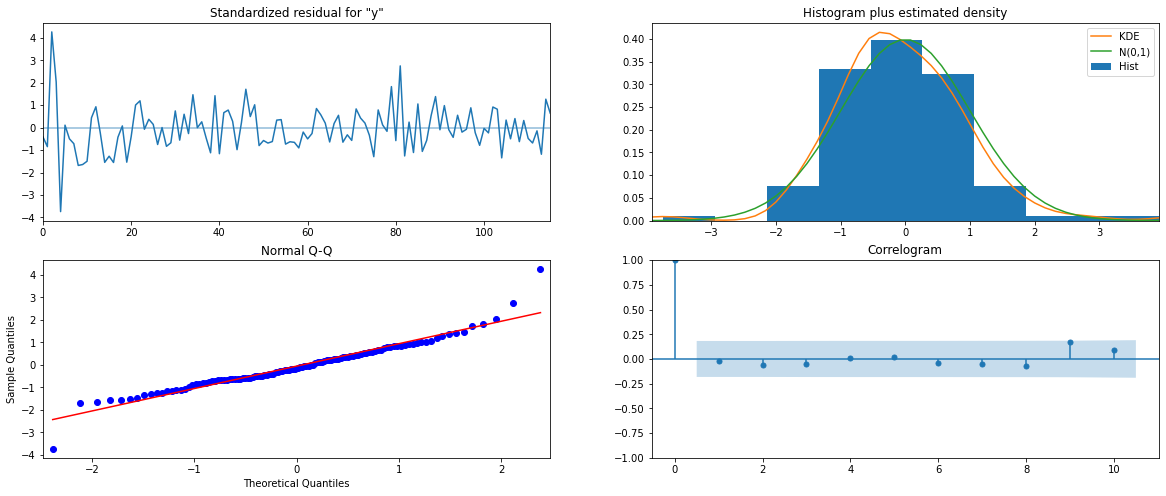

In [161]:
results_auto_SARIMA_6_rose.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

============================================**SPARKLING WINE**==========================================

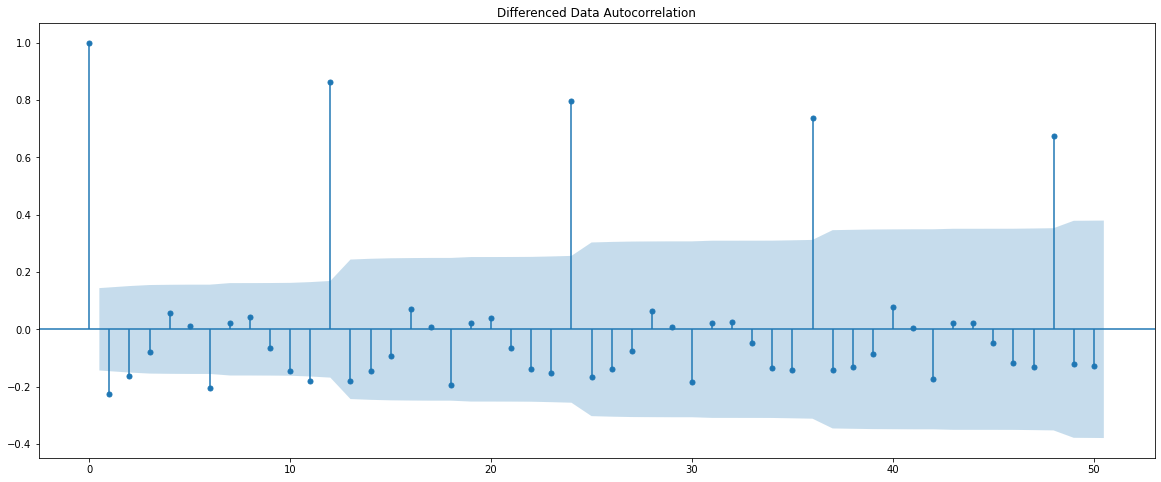

In [162]:
plot_acf(df2['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality =6 and thus using the same.

### Setting the seasonality as 6  to estimate parametrs using auto SARIMA model.

In [163]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [164]:
SARIMA_AIC_sparkling = pd.DataFrame(columns=['param','seasonal', 'AIC'])

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_sparkling = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_sparkling = SARIMA_model_sparkling.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_sparkling.aic))
        SARIMA_AIC_sparkling = SARIMA_AIC_sparkling.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_sparkling.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716284
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890933
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984442563
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111185642
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.199361751051
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657487
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082847
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339543767
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242878454
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298135796
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274084523
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885104034895
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.77179337265
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.7036712072565
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

In [165]:
SARIMA_AIC_sparkling.sort_values(by=['AIC']).head()

param      seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888804
53  (1, 1, 2)  (2, 0, 2, 6)  1730.103879
17  (0, 1, 1)  (2, 0, 2, 6)  1741.703671
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379783
71  (2, 1, 1)  (2, 0, 2, 6)  1743.874207

In [166]:
auto_SARIMA_6_sparkling = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6_sparkling = auto_SARIMA_6_sparkling.fit(maxiter=1000)
print(results_auto_SARIMA_6_sparkling.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.944
Date:                           Sun, 09 Apr 2023   AIC                           1727.889
Time:                                   22:09:37   BIC                           1747.164
Sample:                                        0   HQIC                          1735.713
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7851      0.103     -7.655      0.000      -0.986      -0.584
ma.L2         -0.0975      0.112     -0.870

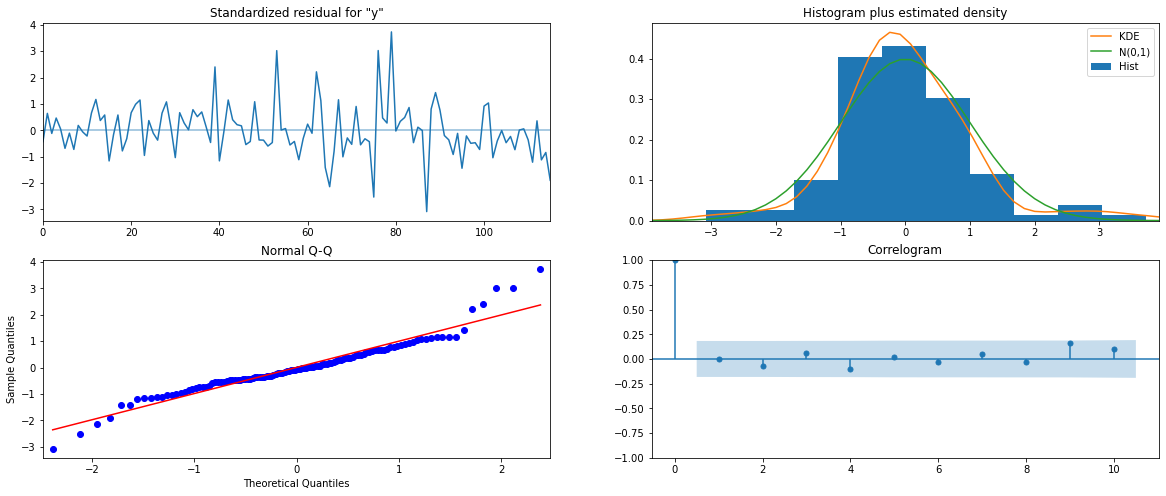

In [167]:
results_auto_SARIMA_6_sparkling.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model

In [168]:
predicted_auto_SARIMA_6_rose = results_auto_SARIMA_6_rose.get_forecast(steps=len(test))

In [169]:
predicted_auto_SARIMA_6_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.841638  18.848275      25.899698      99.783578
1  67.630850  19.300118      29.803314     105.458386
2  74.746923  19.412680      36.698770     112.795076
3  71.325811  19.475627      33.154284     109.497339
4  76.017740  19.483906      37.829985     114.205495

In [170]:
rmse_sarima = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6_rose.predicted_mean,squared=False)
print(rmse_sarima)

23.875177949780486


In [171]:
temp_results1_rose = pd.DataFrame({'Test RMSE': [rmse_sarima]}
                           ,index=['SARIMA(0, 1, 2)(2, 0, 2, 6)'])


resultsDf_SARIMA6_rose = pd.concat([resultsDf_ARIMA_rose, temp_results1_rose])
resultsDf_SARIMA6_rose

Test RMSE
Alpha=0.06,Beta=0.05,TripleExponentialSmoothing    17.250761
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing      35.919239
Alpha=0.995,Simple Exponential Smoothing           13.719236
RegressionOnTime                                   16.816602
NaiveModel                                       5988.718349
SimpleAverageModel                               2345.547766
ARIMA(1,0,2)                                       43.964220
SARIMA(0, 1, 2)(2, 0, 2, 6)                        23.875178

=============================================**SPARKLING WINES**==========================================

In [172]:
predicted_auto_SARIMA_6_sparkling = results_auto_SARIMA_6_sparkling.get_forecast(steps=len(test))

In [173]:
predicted_auto_SARIMA_6_sparkling.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1375.642794  384.078614     622.862544    2128.423045
1  1116.743965  392.846150     346.779659    1886.708271
2  1667.593098  395.419724     892.584681    2442.601515
3  1528.349292  397.979749     748.323318    2308.375266
4  1372.265429  400.523465     587.253862    2157.276996

In [174]:
rmse_sarima = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6_sparkling.predicted_mean,squared=False)
print(rmse_sarima)

640.6531140550481


In [175]:

temp_results_sparkling_s = pd.DataFrame({'Test RMSE': [rmse_sarima]}
                           ,index=['SARIMA(1, 1, 2)(2, 0, 2, 6)'])

resultsDf_SARIMA6_sparkling = pd.concat([resultsDf_ARIMA_sparkling, temp_results_sparkling_s])
resultsDf_SARIMA6_sparkling

Test RMSE
Alpha=0.1,Beta=0.06,TripleExponentialSmoothing   496.574476
Alpha=0.3,SimpleExponentialSmoothing            1935.507132
Alpha=0.995,Simple Exponential Smoothing        1316.034674
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing   1916.344871
RegressionOnTime                                1416.381017
NaiveModel                                      3866.980258
SimpleAverageModel                              1291.154318
ARIMA(2,0,1)                                    1291.633981
SARIMA(1, 1, 2)(2, 0, 2, 6)                      640.653114

### 12 MONTHS

In [176]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [177]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])


for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207255
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380892
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938662
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752176
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697559
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945745
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918332
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383909
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491829
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947153
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.857348330446
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535896
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461664
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988260392989
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541059
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975265068
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.49384866177
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341393
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.540093348283
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913563733
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257992
SARIMA(0, 1, 2)x(2, 0, 1, 

In [178]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.871767
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [179]:
auto_SARIMA_12_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12_rose = auto_SARIMA_12_rose.fit(maxiter=1000)
print(results_auto_SARIMA_12_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 09 Apr 2023   AIC                            887.938
Time:                                    22:10:21   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.601     -0.004      0.996    -372.455     370.769
ma.L2         -0.1573     29.787   

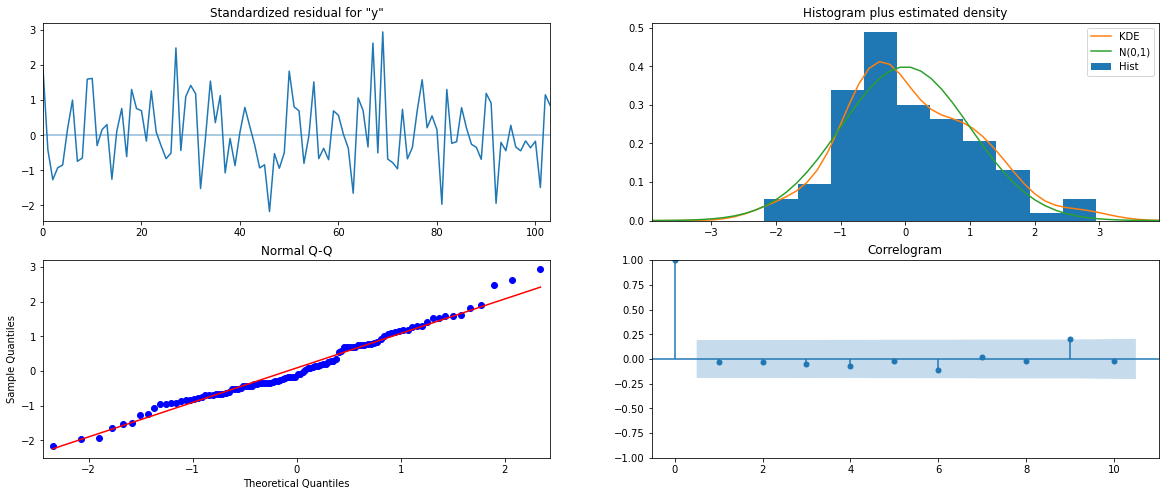

In [180]:
results_auto_SARIMA_12_rose.plot_diagnostics()
plt.show()

In [181]:
SARIMA_AIC_sparkling = pd.DataFrame(columns=['param','seasonal', 'AIC'])


for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_sparkling = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_sparkling = SARIMA_model_sparkling.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_sparkling.aic))
        SARIMA_AIC_sparkling = SARIMA_AIC_sparkling.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_sparkling.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844628
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.153364023882
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388608
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791512
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158611027
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392081
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566358
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572710438
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183803
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193745614
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509146277979
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175065
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245118895248
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824151685
SARIMA(0, 1, 

In [182]:
SARIMA_AIC_sparkling.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934586
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121565
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [183]:
auto_SARIMA_12_sparkling = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12_sparkling = auto_SARIMA_12_sparkling.fit(maxiter=1000)
print(results_auto_SARIMA_12_sparkling.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 09 Apr 2023   AIC                           1555.584
Time:                                    22:11:39   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

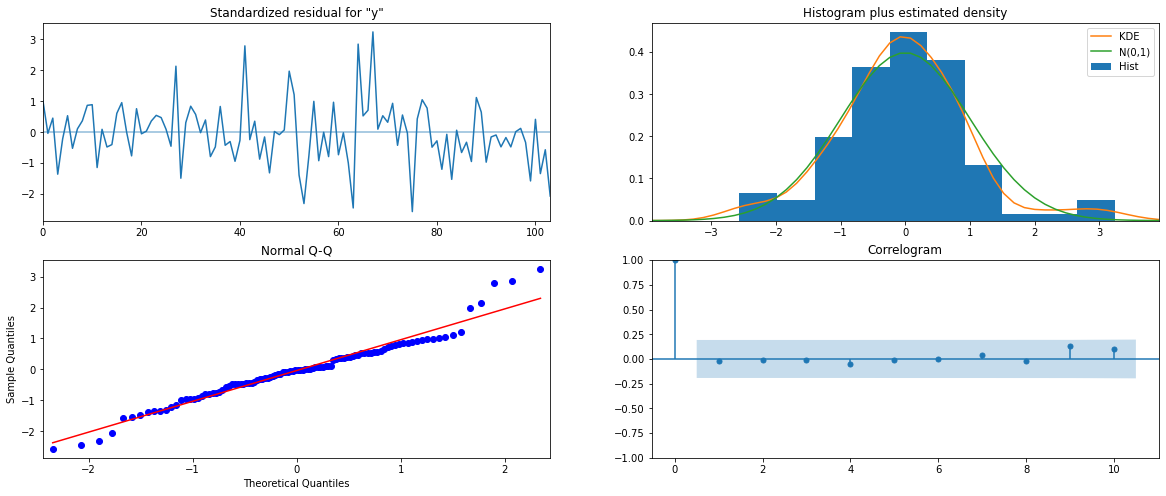

In [184]:
results_auto_SARIMA_12_sparkling.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [185]:
predicted_auto_SARIMA_12_rose = results_auto_SARIMA_12_rose.get_forecast(steps=len(test))

In [186]:
predicted_auto_SARIMA_12_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867262  15.928500      31.647975      94.086549
1  70.541190  16.147658      38.892361     102.190018
2  77.356410  16.147656      45.707586     109.005234
3  76.208814  16.147656      44.559990     107.857637
4  72.747397  16.147656      41.098574     104.396221

In [187]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12_rose.predicted_mean,squared=False)
print(rmse)

24.60057783743746


In [188]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf_SARIMA12_rose = pd.concat([resultsDf_SARIMA6_rose, temp_resultsDf])
resultsDf_SARIMA12_rose

Test RMSE
Alpha=0.06,Beta=0.05,TripleExponentialSmoothing    17.250761
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing      35.919239
Alpha=0.995,Simple Exponential Smoothing           13.719236
RegressionOnTime                                   16.816602
NaiveModel                                       5988.718349
SimpleAverageModel                               2345.547766
ARIMA(1,0,2)                                       43.964220
SARIMA(0, 1, 2)(2, 0, 2, 6)                        23.875178
SARIMA(0,1,2)(2,0,2,12)                            24.600578

In [189]:
predicted_auto_SARIMA_12_sparkling = results_auto_SARIMA_12_sparkling.get_forecast(steps=len(test))

In [190]:
predicted_auto_SARIMA_12_sparkling.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.405734  388.344222     566.265045    2088.546423
1  1315.134972  402.007572     527.214610    2103.055335
2  1621.615695  402.001173     833.707874    2409.523516
3  1598.888239  407.238459     800.715527    2397.060951
4  1392.713351  407.968479     593.109826    2192.316876

In [191]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12_sparkling.predicted_mean,squared=False)
print(rmse)

554.1673210128369


In [192]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])




resultsDf_SARIMA12_sparkling = pd.concat([resultsDf_SARIMA6_sparkling, temp_resultsDf])
resultsDf_SARIMA12_sparkling

Test RMSE
Alpha=0.1,Beta=0.06,TripleExponentialSmoothing   496.574476
Alpha=0.3,SimpleExponentialSmoothing            1935.507132
Alpha=0.995,Simple Exponential Smoothing        1316.034674
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing   1916.344871
RegressionOnTime                                1416.381017
NaiveModel                                      3866.980258
SimpleAverageModel                              1291.154318
ARIMA(2,0,1)                                    1291.633981
SARIMA(1, 1, 2)(2, 0, 2, 6)                      640.653114
SARIMA(1,1,2)(1,0,2,12)                          554.167321

## Building the most optimum model on the Full Data.

In [193]:
full_data_model_rose = sm.tsa.statespace.SARIMAX(df2['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = full_data_model_rose.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -734.147
Date:                           Sun, 09 Apr 2023   AIC                           1482.295
Time:                                   22:11:42   BIC                           1504.287
Sample:                               01-01-1980   HQIC                          1491.218
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7298      0.070    -10.351      0.000      -0.868      -0.592
ma.L2         -0.1898      0.066     -2.882

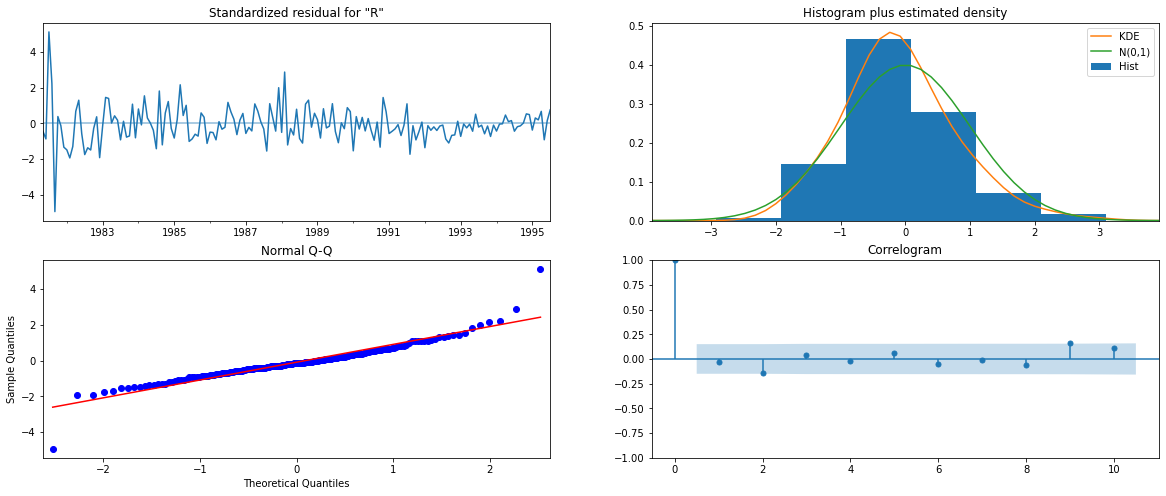

In [194]:
results_full_data_model_rose.plot_diagnostics();

In [195]:
full_data_model_sparkling = sm.tsa.statespace.SARIMAX(df2['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_sparkling = full_data_model_sparkling.fit(maxiter=1000)
print(results_full_data_model_sparkling.summary())

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood               -1172.688
Date:                            Sun, 09 Apr 2023   AIC                           2361.375
Time:                                    22:11:48   BIC                           2385.926
Sample:                                01-01-1980   HQIC                          2371.345
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6537      0.269     -2.429      0.015      -1.181      -0.126
ma.L1         -0.1846      0.243   

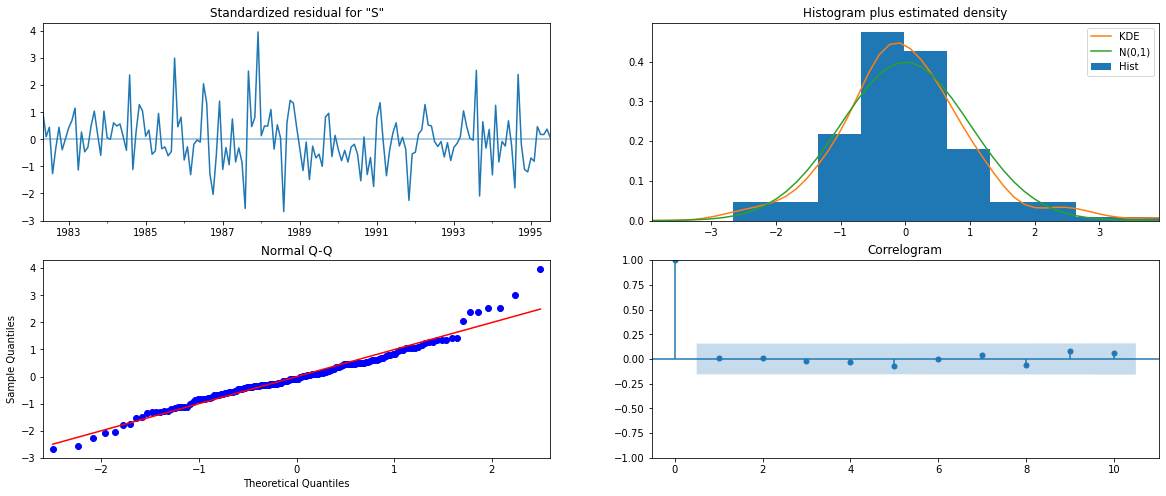

In [196]:
results_full_data_model_sparkling.plot_diagnostics();

### Evaluate the model on the whole and predict 12 months into the future (till the end of next year).


In [197]:
predicted_manual_SARIMA_6_full_data_rose = results_full_data_model_rose.get_forecast(steps=12)

In [198]:
predicted_manual_SARIMA_6_full_data_rose.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  51.904938  16.961260      18.661479      85.148397
1995-09-01  48.560253  17.562797      14.137804      82.982703
1995-10-01  51.875644  17.615651      17.349602      86.401685
1995-11-01  52.523514  17.668347      17.894190      87.152838
1995-12-01  70.921484  17.720886      36.189185     105.653783

In [199]:
rmse = mean_squared_error(df2['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 28.050855970900198


In [200]:
pred_full_manual_SARIMA_date_rose = predicted_manual_SARIMA_6_full_data_rose.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-1',end='1996-08-1', freq='M'))

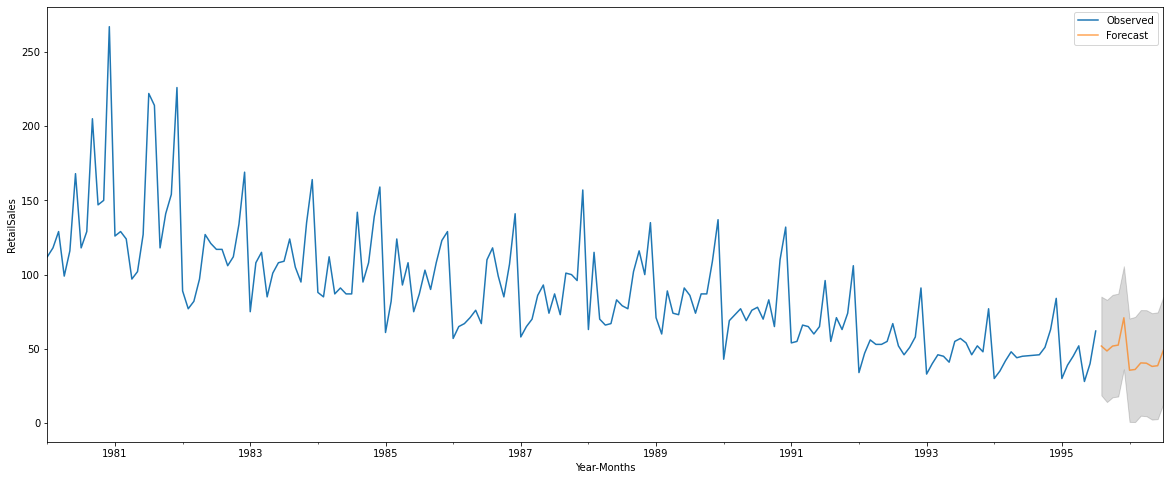

In [201]:

axis = df2['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date_rose['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date_rose.index, pred_full_manual_SARIMA_date_rose['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date_rose['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

=============================================**SPARKLING WIRE**=====================================================

In [202]:
predicted_manual_SARIMA_6_full_data_sparkling = results_full_data_model_sparkling.get_forecast(steps=12)

In [203]:
predicted_manual_SARIMA_6_full_data_sparkling.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1857.369299  381.050319    1110.524398    2604.214201
1995-09-01  2457.822281  385.998910    1701.278319    3214.366243
1995-10-01  3317.324763  386.107127    2560.568699    4074.080827
1995-11-01  4018.893193  387.886031    3258.650542    4779.135844
1995-12-01  6289.641752  387.946822    5529.279953    7050.003552

In [204]:
rmse = mean_squared_error(df2['Sparkling'],results_full_data_model_sparkling.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 536.2063159909976


In [205]:
pred_full_manual_SARIMA_date_sparkling = predicted_manual_SARIMA_6_full_data_sparkling.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-1',end='1996-08-1', freq='M'))

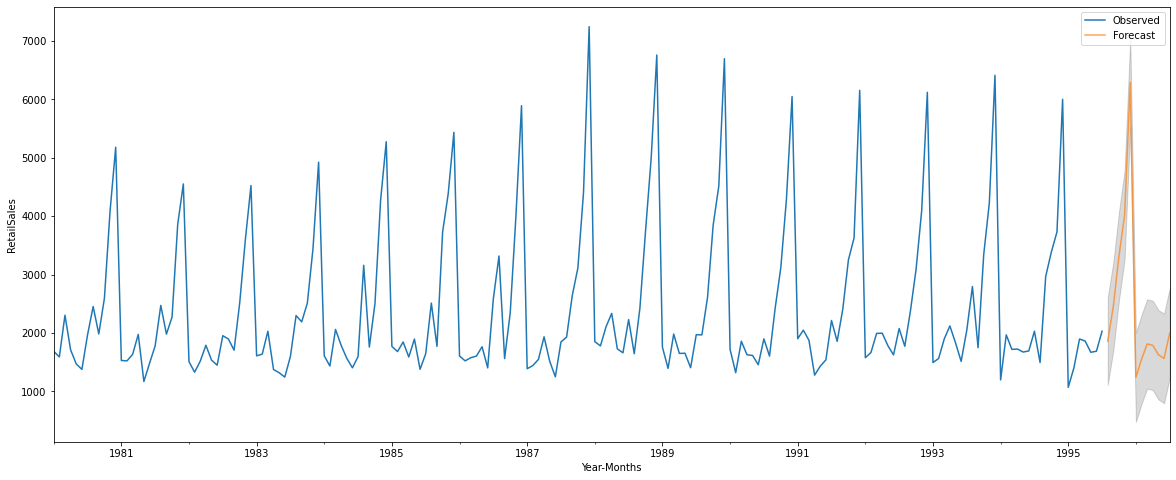

In [206]:

axis = df2['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date_sparkling['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date_sparkling.index, pred_full_manual_SARIMA_date_sparkling['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date_sparkling['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()